In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
train.head()

WELLNUM  DEPTH      DTC      DTS       BS     CALI      DEN     DENC   GR  \
0        0 335.16 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 5.33   
1        0 335.66 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 5.82   
2        0 336.16 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 6.52   
3        0 336.66 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 7.23   
4        0 337.16 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 9.50   

       NEU      PEF     RDEP     RMED      ROP     PHIF       SW      VSH  
0 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00  
1 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00  
2 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00  
3 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00  
4 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00 -9999.00

In [5]:
train.describe()

WELLNUM     DEPTH       DTC       DTS        BS      CALI       DEN  \
count 318967.00 318967.00 318967.00 318967.00 318967.00 318967.00 318967.00   
mean       4.08   6998.18  -7791.05  -8605.14   -958.27  -6982.04  -7000.76   
std        2.46   3797.94   4168.06   3491.48   2969.16   4592.48   4582.29   
min        0.00    335.16  -9999.00  -9999.00  -9999.00  -9999.00  -9999.00   
25%        2.00   3757.87  -9999.00  -9999.00      8.50  -9999.00  -9999.00   
50%        4.00   6905.18  -9999.00  -9999.00     17.50  -9999.00  -9999.00   
75%        6.00  10052.49  -9999.00  -9999.00     26.00      8.56      2.25   
max        8.00  15651.58    181.81    388.84     36.00     20.33      3.09   

           DENC        GR       NEU       PEF      RDEP      RMED       ROP  \
count 318967.00 318967.00 318967.00 318967.00 318967.00 318967.00 318967.00   
mean   -7205.37    -43.03  -7007.12  -7221.97   -949.84   -804.02   -989.37   
std     4486.57    990.10   4578.76   4480.14   2944.07   4177.16   3028.43   
min    -9999.00  -9999.00  -9999.00  -9999.00  -9999.00  -9999.00  -9999.00   
25%    -9999.00     23.33  -9999.00  -9999.00      0.65      0.67     15.20   
50%    -9999.00     55.51  -9999.00  -9999.00      1.10      1.15     24.97   
75%        0.03     78.98      0.09      0.06      2.02      2.15     30.63   
max        0.33   1124.44      1.46     13.84  80266.80  97543.40    208.63   

           PHIF        SW       VSH  
count 318967.00 318967.00 318967.00  
mean   -8515.78  -8515.69  -8585.16  
std     3554.02   3554.22   3484.04  
min    -9999.00  -9999.00  -9999.00  
25%    -9999.00  -9999.00  -9999.00  
50%    -9999.00  -9999.00  -9999.00  
75%    -9999.00  -9999.00  -9999.00  
max        0.40      1.00      3.65

In [6]:
train.WELLNUM.value_counts() * 100/len(train)

6   14.38
7   13.73
4   12.22
5   11.22
2   10.93
1   10.77
3   10.25
0    9.33
8    7.17
Name: WELLNUM, dtype: float64

In [7]:
train.replace(['-9999', -9999], np.nan, inplace=True)
test.replace(['-9999', -9999], np.nan, inplace=True)

train.head()

WELLNUM  DEPTH  DTC  DTS  BS  CALI  DEN  DENC   GR  NEU  PEF  RDEP  RMED  \
0        0 335.16  NaN  NaN NaN   NaN  NaN   NaN 5.33  NaN  NaN   NaN   NaN   
1        0 335.66  NaN  NaN NaN   NaN  NaN   NaN 5.82  NaN  NaN   NaN   NaN   
2        0 336.16  NaN  NaN NaN   NaN  NaN   NaN 6.52  NaN  NaN   NaN   NaN   
3        0 336.66  NaN  NaN NaN   NaN  NaN   NaN 7.23  NaN  NaN   NaN   NaN   
4        0 337.16  NaN  NaN NaN   NaN  NaN   NaN 9.50  NaN  NaN   NaN   NaN   

   ROP  PHIF  SW  VSH  
0  NaN   NaN NaN  NaN  
1  NaN   NaN NaN  NaN  
2  NaN   NaN NaN  NaN  
3  NaN   NaN NaN  NaN  
4  NaN   NaN NaN  NaN

In [8]:
train.WELLNUM.value_counts()

6    45874
7    43786
4    38971
5    35790
2    34871
1    34361
3    32691
0    29754
8    22869
Name: WELLNUM, dtype: int64

In [9]:
def log_plot(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=17, figsize=(15, 10))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.DTC, logs.DEPTH, color='red')
    ax[2].plot(logs.DTS, logs.DEPTH, color='black')
    ax[3].plot(logs.BS, logs.DEPTH, color='darkorange')
    ax[4].plot(logs.CALI, logs.DEPTH, color='tan')
    ax[5].plot(logs.DEN, logs.DEPTH, color='navy')
    ax[6].plot(logs.DENC, logs.DEPTH, color='blueviolet')
    ax[7].plot(logs.NEU, logs.DEPTH, color='chocolate')
    ax[8].plot(logs.PEF, logs.DEPTH, color='cyan')
    ax[9].plot(logs.RDEP, logs.DEPTH, color='crimson')
    ax[10].plot(logs.RMED, logs.DEPTH, color='magenta')
    ax[11].plot(logs.ROP, logs.DEPTH, color='olive')
    ax[12].plot(logs.PHIF, logs.DEPTH, color='teal')
    ax[13].plot(logs.SW, logs.DEPTH, color='gray')
    ax[14].plot(logs.VSH, logs.DEPTH, color='deepskyblue')
  
    
    
    
    
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 0,color = 'blue')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 1,color = 'red')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 2,color = 'green')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 3,color = 'purple')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 4,color = 'brown')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 5,color = 'gray')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 6,color = 'yellow')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 7,color = 'navy')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 8,color = 'orange')

                

    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR", fontsize = 10)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)",fontsize = 16)
    ax[1].set_xlabel("DTC", fontsize = 10)
    ax[1].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[2].set_xlabel("DTS", fontsize = 10)
    ax[2].set_xlim(logs.DTS.min(),logs.DTS.max())
    ax[3].set_xlabel("BS", fontsize = 10)
    ax[3].set_xlim(logs.BS.min(),logs.DEN.max())
    ax[4].set_xlabel("CALI", fontsize = 10)
    ax[4].set_xlim(logs.CALI.min(),logs.DEN.max())
    ax[5].set_xlabel("DEN", fontsize = 10)
    ax[5].set_xlim(logs.DEN.min(),logs.DEN.max())
    ax[6].set_xlabel("DENC", fontsize = 10)
    ax[6].set_xlim(logs.DENC.min(),logs.DEN.max())
    ax[7].set_xlabel("NEU", fontsize = 10)
    ax[7].set_xlim(logs.NEU.min(),logs.DEN.max())
    ax[8].set_xlabel("PEF", fontsize = 10)
    ax[8].set_xlim(logs.PEF.min(),logs.DEN.max())
    ax[9].set_xlabel("RDEP", fontsize = 10)
    ax[9].set_xlim(logs.RDEP.min(),logs.DEN.max())
    ax[10].set_xlabel("RMED", fontsize = 10)
    ax[10].set_xlim(logs.RMED.min(),logs.DEN.max())
    ax[11].set_xlabel("ROP", fontsize = 10)
    ax[11].set_xlim(logs.ROP.min(),logs.DEN.max())
    ax[12].set_xlabel("PHIF", fontsize = 10)
    ax[12].set_xlim(logs.PHIF.min(),logs.DEN.max())
    ax[13].set_xlabel("SW", fontsize = 10)
    ax[13].set_xlim(logs.SW.min(),logs.DEN.max())
    ax[14].set_xlabel("VSH", fontsize = 10)
    ax[14].set_xlim(logs.VSH.min(),logs.DEN.max())
    
    ax[15].set_xlabel("WELLNUM", fontsize = 10)
    
#    ax[15].set_xlim(logs.WELLNUM.min(),logs.WELLNUM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='0'),
                       Patch(facecolor='red', edgecolor='red',   label='1'),
                       Patch(facecolor='green', edgecolor='green', label='2'),
                       Patch(facecolor='purple', edgecolor='purple', label='3'),
                       Patch(facecolor='brown', edgecolor='brown', label='4'),
                       Patch(facecolor='gray', edgecolor='gray', label='5'),
                       Patch(facecolor='yellow', edgecolor='yellow', label='6'),
                       Patch(facecolor='navy', edgecolor='navy', label='7'),
                       Patch(facecolor='orange', edgecolor='orange', label='8')]
                             
    ax[15].legend(handles=legend_elements, loc='best')
    
    f.suptitle('Well Logs', fontsize=20,y=0.94)

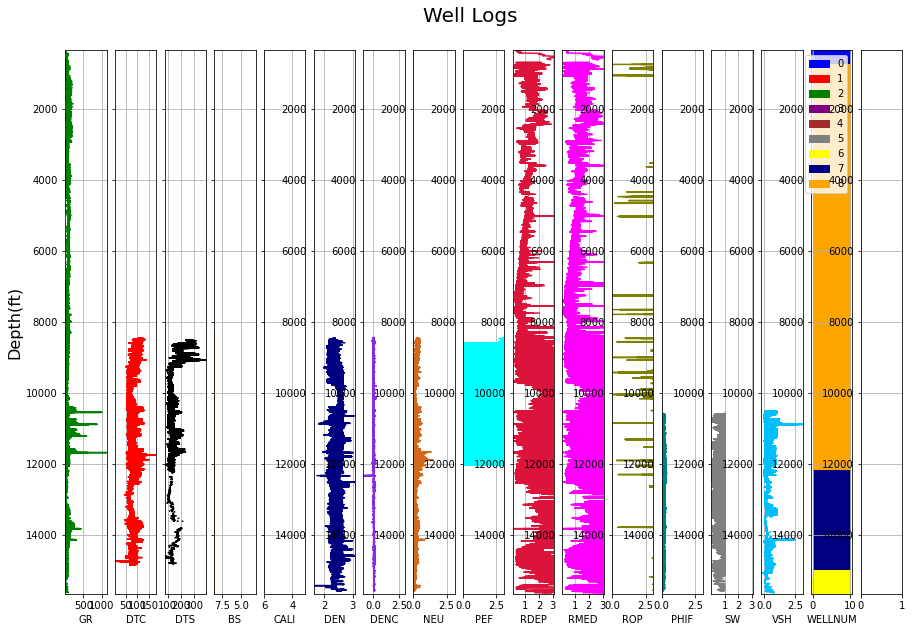

In [10]:
log_plot(train)

In [11]:
train.isna().sum()/len(train)

WELLNUM   0.00
DEPTH     0.00
DTC       0.78
DTS       0.86
BS        0.10
CALI      0.70
DEN       0.70
DENC      0.72
GR        0.01
NEU       0.70
PEF       0.72
RDEP      0.10
RMED      0.09
ROP       0.10
PHIF      0.85
SW        0.85
VSH       0.86
dtype: float64

In [12]:
len(train[train.PHIF.isna() & train.SW.isna() & train.VSH.isna()])/len(train)

0.8429147842880298

In [13]:
train['all_null'] = (train.PHIF.isna() & train.SW.isna() & train.VSH.isna())

In [14]:
train.head()

WELLNUM  DEPTH  DTC  DTS  BS  CALI  DEN  DENC   GR  NEU  PEF  RDEP  RMED  \
0        0 335.16  NaN  NaN NaN   NaN  NaN   NaN 5.33  NaN  NaN   NaN   NaN   
1        0 335.66  NaN  NaN NaN   NaN  NaN   NaN 5.82  NaN  NaN   NaN   NaN   
2        0 336.16  NaN  NaN NaN   NaN  NaN   NaN 6.52  NaN  NaN   NaN   NaN   
3        0 336.66  NaN  NaN NaN   NaN  NaN   NaN 7.23  NaN  NaN   NaN   NaN   
4        0 337.16  NaN  NaN NaN   NaN  NaN   NaN 9.50  NaN  NaN   NaN   NaN   

   ROP  PHIF  SW  VSH  all_null  
0  NaN   NaN NaN  NaN      True  
1  NaN   NaN NaN  NaN      True  
2  NaN   NaN NaN  NaN      True  
3  NaN   NaN NaN  NaN      True  
4  NaN   NaN NaN  NaN      True

In [15]:
train_clean = train[train.all_null == False].drop('all_null', axis = 1).reset_index(drop = True)

In [16]:
train_clean.head()

WELLNUM    DEPTH    DTC  DTS  BS  CALI  DEN  DENC    GR  NEU  PEF  RDEP  \
0        0 11709.16 132.24  NaN NaN 12.99 2.29   NaN 62.74 0.42  NaN  1.18   
1        0 11709.66 123.92  NaN NaN 12.63 2.30   NaN 53.84 0.74  NaN  0.88   
2        0 11710.16 115.06  NaN NaN 12.77 2.28   NaN 52.85 0.46  NaN  0.95   
3        0 11710.66 121.88  NaN NaN 11.77 2.28   NaN 58.23 0.50  NaN  0.87   
4        0 11711.16 125.35  NaN NaN 11.62 2.33   NaN 57.34 0.60  NaN  0.83   

   RMED  ROP  PHIF   SW  VSH  
0  0.78  NaN  0.18 1.00  NaN  
1  1.08  NaN  0.18 1.00  NaN  
2  0.92  NaN  0.17 1.00  NaN  
3  1.24  NaN  0.16 1.00  NaN  
4  0.96  NaN  0.15 1.00  NaN

In [17]:
train_clean.isna().sum()/len(train_clean)

WELLNUM   0.00
DEPTH     0.00
DTC       0.48
DTS       0.84
BS        0.14
CALI      0.02
DEN       0.02
DENC      0.16
GR        0.00
NEU       0.02
PEF       0.16
RDEP      0.01
RMED      0.00
ROP       0.14
PHIF      0.06
SW        0.06
VSH       0.10
dtype: float64

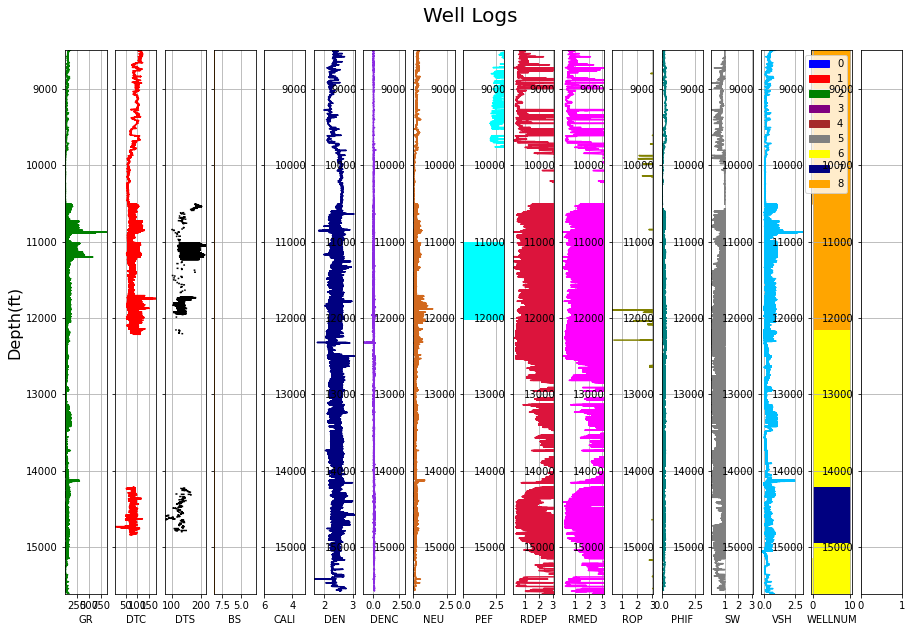

In [18]:
log_plot(train_clean)

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

In [19]:
# GR and NEU seems to be a good predictor for Vsh
# DEN seems to be a good predictor for PHIF

In [20]:
len(train_clean)

50105

In [21]:
train_clean.describe()

WELLNUM    DEPTH      DTC     DTS       BS     CALI      DEN     DENC  \
count 50105.00 50105.00 25885.00 8229.00 43220.00 49058.00 49104.00 42219.00   
mean      4.37 12297.65    78.91  137.97     8.50     8.76     2.41     0.05   
std       2.62  1551.76    15.53   24.13     0.00     0.52     0.16     0.03   
min       0.00  8494.00     1.03   74.82     8.50     6.00     1.63    -0.98   
25%       2.00 11229.00    68.37  124.53     8.50     8.57     2.26     0.03   
50%       5.00 12009.84    75.38  133.53     8.50     8.62     2.43     0.05   
75%       6.00 13394.36    86.88  141.52     8.50     8.70     2.55     0.06   
max       8.00 15614.17   181.81  217.97     8.50    20.33     3.09     0.26   

            GR      NEU      PEF     RDEP     RMED      ROP     PHIF       SW  \
count 50105.00 48911.00 42219.00 49772.00 50006.00 43123.00 47314.00 47314.00   
mean     45.58     0.19     5.14    22.01   873.03    23.38     0.14     0.70   
std      45.77     0.09     1.84   406.24  7189.75     7.82     0.09     0.35   
min       2.77    -0.00    -0.02     0.07     0.09     0.34     0.00     0.01   
25%      19.89     0.14     4.55     1.44     1.48    18.84     0.06     0.34   
50%      36.01     0.18     5.42     2.67     3.07    24.95     0.13     0.93   
75%      54.15     0.22     6.13     7.36     8.72    29.91     0.22     1.00   
max     873.77     1.46    13.36 80266.80 62290.80    77.63     0.40     1.00   

           VSH  
count 45100.00  
mean      0.31  
std       0.25  
min      -0.25  
25%       0.12  
50%       0.25  
75%       0.39  
max       3.65

values between 13000 and 14500 are missing

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['DEPTH','WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

To remove:

depth
bit size
CAL
well number
*Corrected Density (leave till later)

WORKFLOW
- Remove irrelevant variables (majorly based on domain knowledge)

-Remove missing values

-Remove outliers (with specific outlier removal techniques and good reasons) 

-Check integrity of data after outlier removal (Ensure that there are no missing values and both predicting and target variables are available with values) 

-Check for collinearity and select appropriate predicting variables alongside other good reasons besides collinearity. 

-Please Ensure to have good plots in all steps and appropriate comments where applicable

In [22]:
train_clean.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')

In [23]:
Train_clean = train_clean.drop(['WELLNUM', 'DEPTH','BS','DENC'], axis = 1)
 # 'BS','DENC' dropped for low variance
print(len(Train_clean))
Train_clean.head()

50105


DTC  DTS  CALI  DEN    GR  NEU  PEF  RDEP  RMED  ROP  PHIF   SW  VSH
0 132.24  NaN 12.99 2.29 62.74 0.42  NaN  1.18  0.78  NaN  0.18 1.00  NaN
1 123.92  NaN 12.63 2.30 53.84 0.74  NaN  0.88  1.08  NaN  0.18 1.00  NaN
2 115.06  NaN 12.77 2.28 52.85 0.46  NaN  0.95  0.92  NaN  0.17 1.00  NaN
3 121.88  NaN 11.77 2.28 58.23 0.50  NaN  0.87  1.24  NaN  0.16 1.00  NaN
4 125.35  NaN 11.62 2.33 57.34 0.60  NaN  0.83  0.96  NaN  0.15 1.00  NaN

In [24]:
Train_clean.describe()

DTC     DTS     CALI      DEN       GR      NEU      PEF     RDEP  \
count 25885.00 8229.00 49058.00 49104.00 50105.00 48911.00 42219.00 49772.00   
mean     78.91  137.97     8.76     2.41    45.58     0.19     5.14    22.01   
std      15.53   24.13     0.52     0.16    45.77     0.09     1.84   406.24   
min       1.03   74.82     6.00     1.63     2.77    -0.00    -0.02     0.07   
25%      68.37  124.53     8.57     2.26    19.89     0.14     4.55     1.44   
50%      75.38  133.53     8.62     2.43    36.01     0.18     5.42     2.67   
75%      86.88  141.52     8.70     2.55    54.15     0.22     6.13     7.36   
max     181.81  217.97    20.33     3.09   873.77     1.46    13.36 80266.80   

          RMED      ROP     PHIF       SW      VSH  
count 50006.00 43123.00 47314.00 47314.00 45100.00  
mean    873.03    23.38     0.14     0.70     0.31  
std    7189.75     7.82     0.09     0.35     0.25  
min       0.09     0.34     0.00     0.01    -0.25  
25%       1.48    18.84     0.06     0.34     0.12  
50%       3.07    24.95     0.13     0.93     0.25  
75%       8.72    29.91     0.22     1.00     0.39  
max   62290.80    77.63     0.40     1.00     3.65

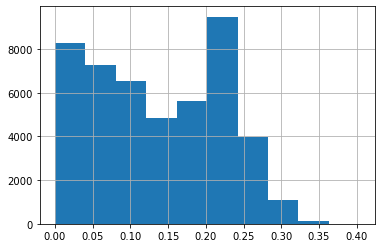

In [25]:
Train_clean.PHIF.hist();

In [26]:
Train_clean.var()

DTC         241.13
DTS         582.36
CALI          0.27
DEN           0.03
GR         2095.32
NEU           0.01
PEF           3.38
RDEP     165033.84
RMED   51692463.01
ROP          61.14
PHIF          0.01
SW            0.12
VSH           0.06
dtype: float64

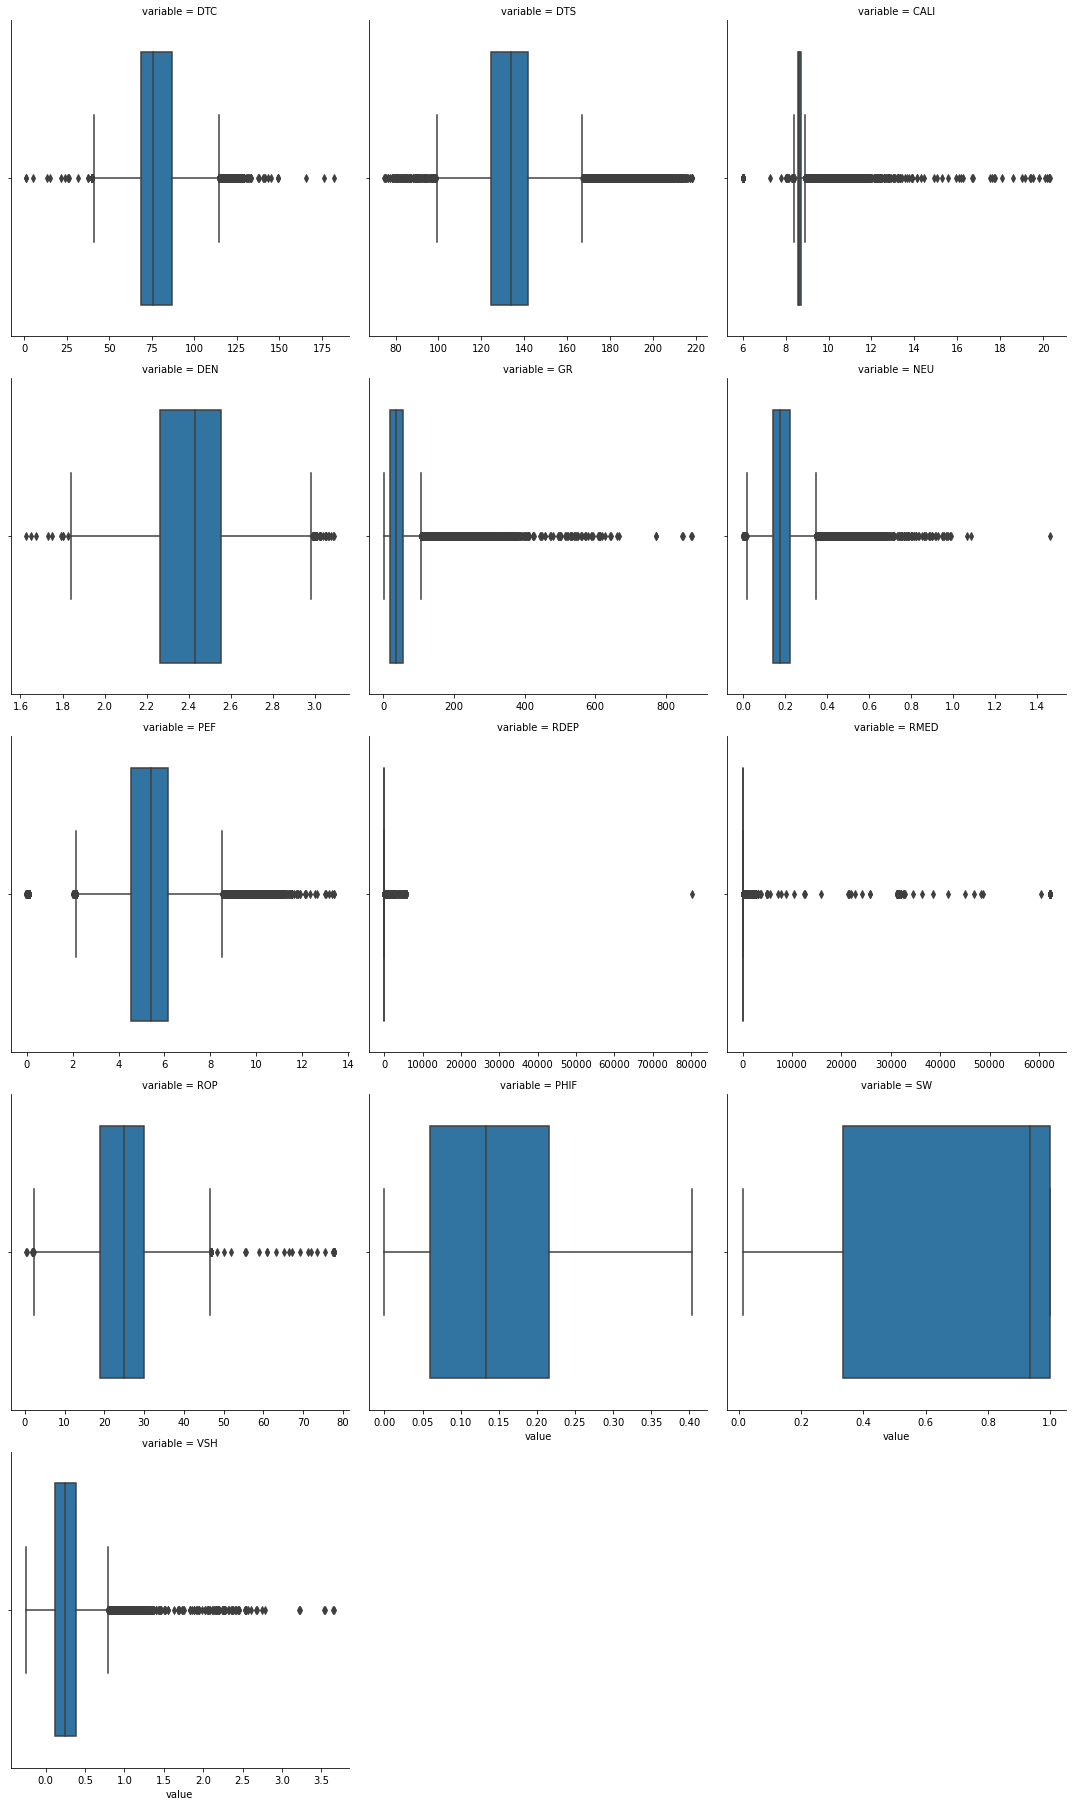

In [27]:
train_melt = Train_clean.melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [28]:
Train_clean.columns

Index(['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP',
       'PHIF', 'SW', 'VSH'],
      dtype='object')

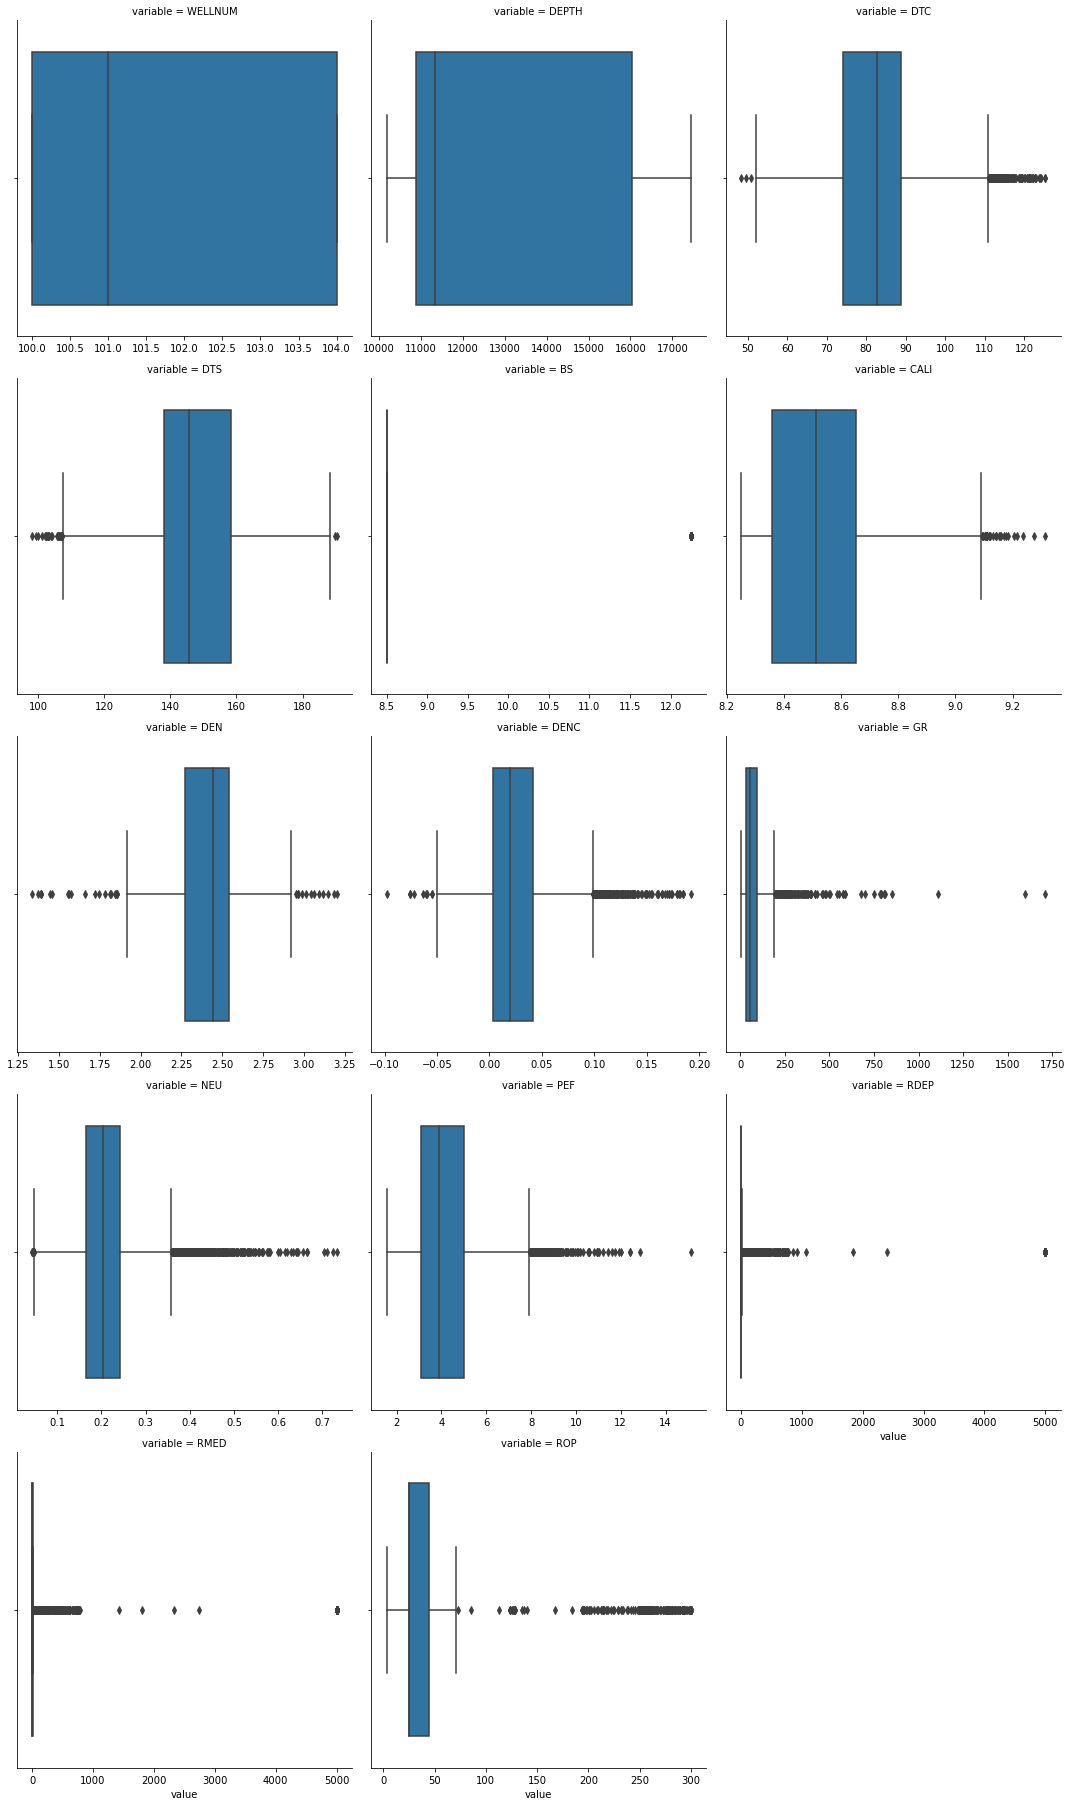

In [29]:
test_melt = test.melt(var_name='variable', value_name='value')
g = sns.catplot(data = test_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

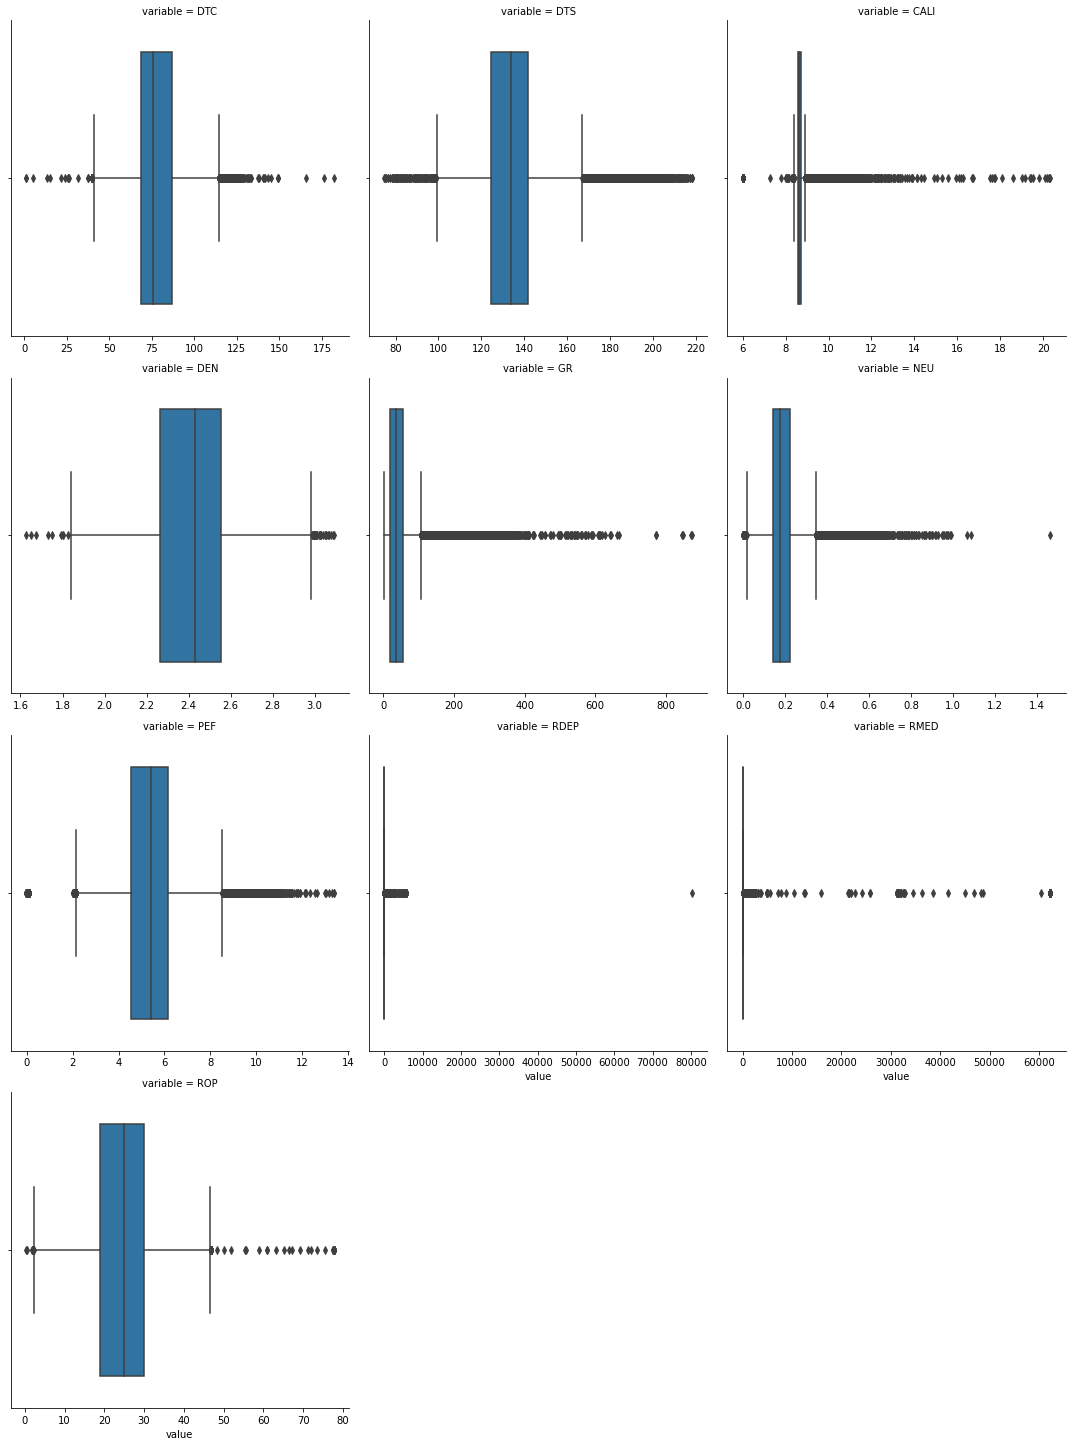

In [30]:
train_melt = Train_clean[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [31]:
test.describe()

WELLNUM    DEPTH      DTC     DTS       BS     CALI      DEN     DENC  \
count 11275.00 11275.00 10614.00 3911.00 11275.00 11275.00 11193.00 11193.00   
mean    102.01 12643.58    81.92  146.65     8.53     8.53     2.41     0.03   
std       1.64  2516.27    11.36   15.44     0.31     0.19     0.15     0.03   
min     100.00 10177.50    48.28   98.21     8.50     8.25     1.33    -0.10   
25%     100.00 10869.50    74.20  138.00     8.50     8.36     2.27     0.00   
50%     101.00 11343.00    82.69  145.53     8.50     8.51     2.45     0.02   
75%     104.00 16034.25    88.91  158.38     8.50     8.65     2.54     0.04   
max     104.00 17443.50   125.39  190.26    12.25     9.31     3.20     0.19   

            GR      NEU      PEF     RDEP     RMED     ROP  
count 11275.00 11271.00 11193.00 11198.00 11198.00 6394.00  
mean     65.90     0.21     4.14    32.27    35.85   44.89  
std      56.26     0.08     1.43   265.81   301.75   56.58  
min       3.99     0.04     1.55     0.10     0.10    3.02  
25%      30.11     0.16     3.08     1.74     1.70   24.82  
50%      53.77     0.20     3.90     2.86     2.76   25.05  
75%      94.25     0.24     5.02     8.18     7.88   44.09  
max    1711.42     0.73    15.14  5000.00  5000.00  300.11

In [32]:
Train_clean.describe()

DTC     DTS     CALI      DEN       GR      NEU      PEF     RDEP  \
count 25885.00 8229.00 49058.00 49104.00 50105.00 48911.00 42219.00 49772.00   
mean     78.91  137.97     8.76     2.41    45.58     0.19     5.14    22.01   
std      15.53   24.13     0.52     0.16    45.77     0.09     1.84   406.24   
min       1.03   74.82     6.00     1.63     2.77    -0.00    -0.02     0.07   
25%      68.37  124.53     8.57     2.26    19.89     0.14     4.55     1.44   
50%      75.38  133.53     8.62     2.43    36.01     0.18     5.42     2.67   
75%      86.88  141.52     8.70     2.55    54.15     0.22     6.13     7.36   
max     181.81  217.97    20.33     3.09   873.77     1.46    13.36 80266.80   

          RMED      ROP     PHIF       SW      VSH  
count 50006.00 43123.00 47314.00 47314.00 45100.00  
mean    873.03    23.38     0.14     0.70     0.31  
std    7189.75     7.82     0.09     0.35     0.25  
min       0.09     0.34     0.00     0.01    -0.25  
25%       1.48    18.84     0.06     0.34     0.12  
50%       3.07    24.95     0.13     0.93     0.25  
75%       8.72    29.91     0.22     1.00     0.39  
max   62290.80    77.63     0.40     1.00     3.65

In [33]:
len(Train_clean)

50105

In [34]:
condition = ((Train_clean.NEU <= 1.1) & (Train_clean.RDEP <= 10000))
print('applying the condition will leave us with {} rows of data'.format(sum(condition)))

applying the condition will leave us with 48675 rows of data


In [35]:
Train_data = Train_clean[condition]
print(len(Train_data))

48675


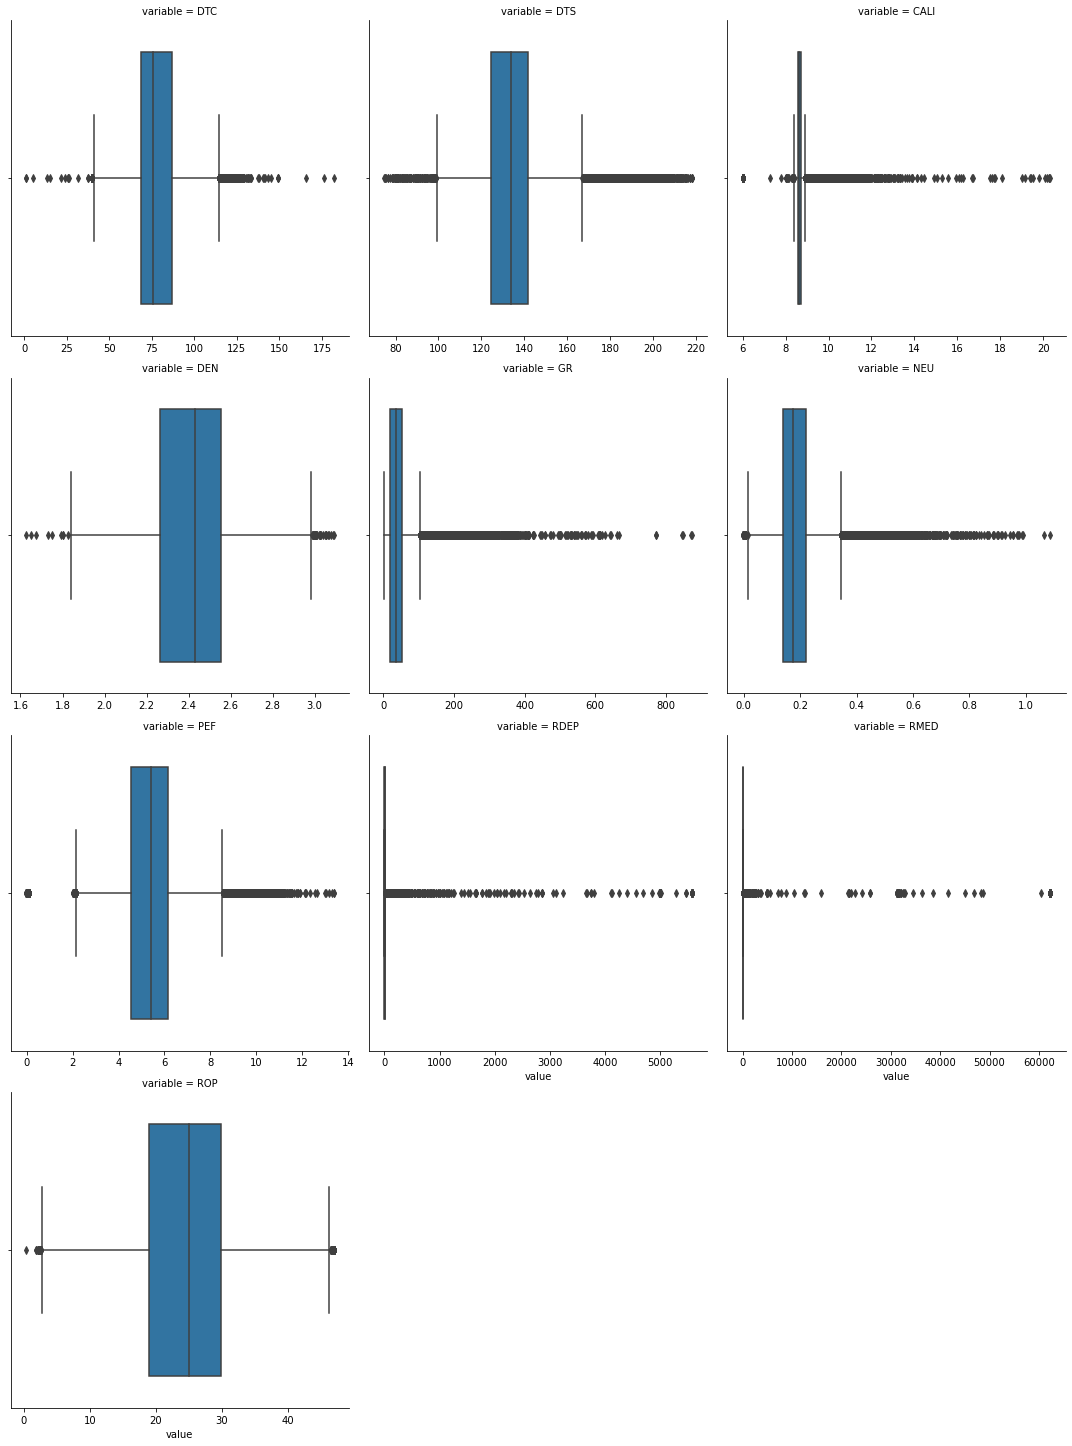

In [36]:
train_melt = Train_data[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

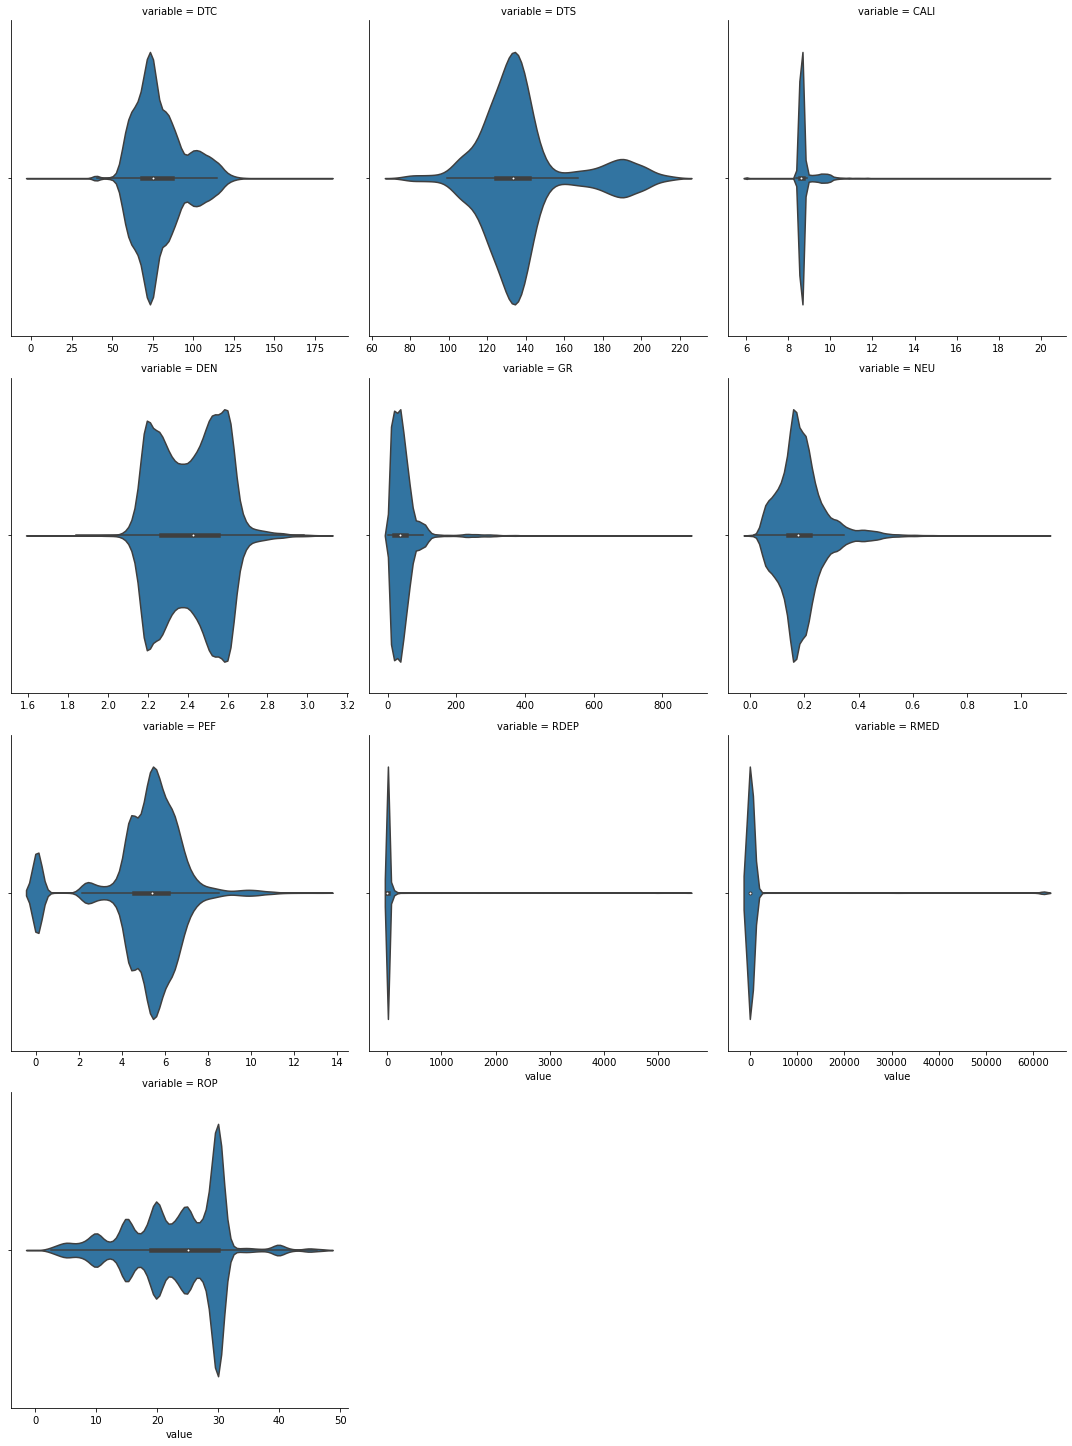

In [37]:
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'violin', sharex = False, col_wrap = 3)

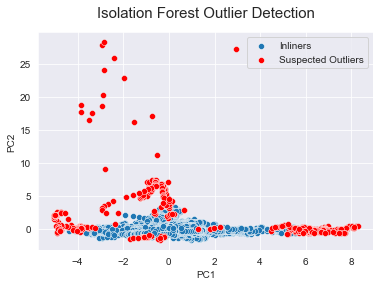

In [38]:
# Use Isolation Forest to detect the prescence of outliers
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

XI = Train_data[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].dropna().values

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(XI)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = XI[outlier_index]

# Feature scaling 
sc=StandardScaler()
XI_scaled = sc.fit_transform(XI)
outlier_values_scaled = sc.transform(outlier_values)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
XI_pca = pca.fit_transform(XI_scaled)
outlier_values_pca = pca.transform(outlier_values_scaled)

# Plot the data
sns.scatterplot(x=XI_pca[:,0], y=XI_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0], 
                y=outlier_values_pca[:,1], color='r')
plt.title("Isolation Forest Outlier Detection", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Inliners','Suspected Outliers'])

In [39]:
len(XI)

8151

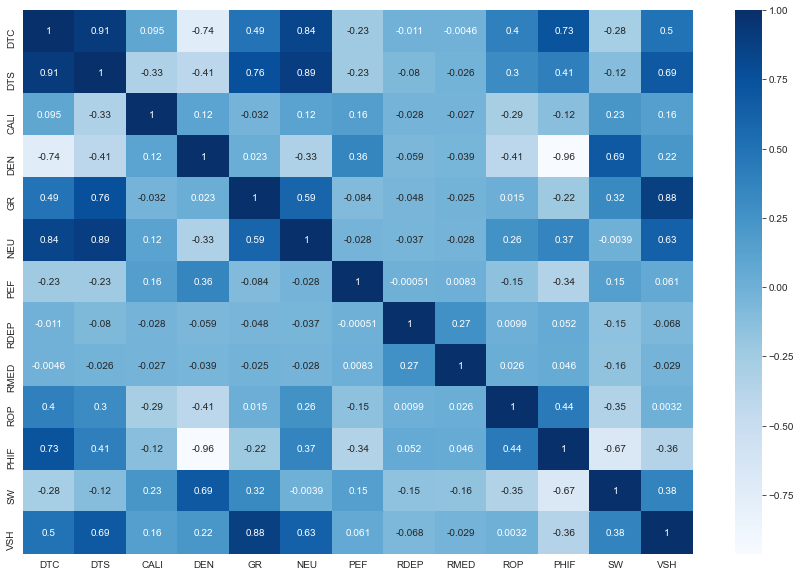

In [40]:
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = Train_data.corr()
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Blues')

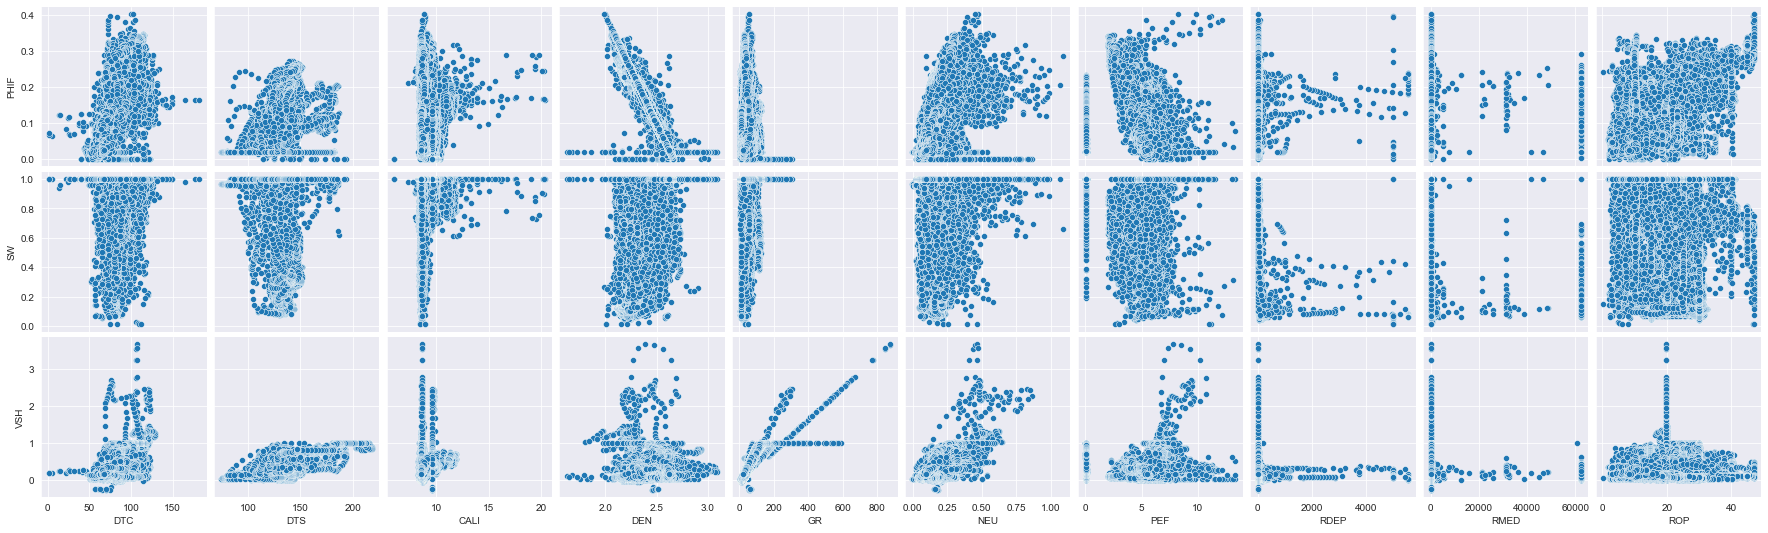

In [41]:
sns.pairplot(Train_data, x_vars = ['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP'], y_vars = ['PHIF','SW','VSH']);

In [42]:
Train_data.columns

Index(['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP',
       'PHIF', 'SW', 'VSH'],
      dtype='object')

In [43]:
Train_data.isna().sum()/len(Train_data)

DTC    0.47
DTS    0.83
CALI   0.00
DEN    0.00
GR     0.00
NEU    0.00
PEF    0.14
RDEP   0.00
RMED   0.00
ROP    0.14
PHIF   0.03
SW     0.03
VSH    0.10
dtype: float64

In [44]:
Train_data_copy = Train_data.copy()

In [45]:
Train_data = Train_data[['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP','PHIF', 'SW', 'VSH']]
print(len(Train_data))

48675


In [46]:
X_col = Train_data.columns[:-3]
y_col = Train_data.columns[-3:]

In [47]:
Train_data.describe()

CALI      DEN       GR      NEU      PEF     RDEP     RMED      ROP  \
count 48674.00 48675.00 48675.00 48675.00 41791.00 48675.00 48675.00 41694.00   
mean      8.76     2.41    44.87     0.19     5.13    20.82   650.31    23.41   
std       0.52     0.16    45.88     0.09     1.84   190.92  6175.63     7.66   
min       6.00     1.63     2.77    -0.00    -0.02     0.07     0.09     0.34   
25%       8.57     2.26    19.45     0.14     4.54     1.45     1.49    19.00   
50%       8.62     2.43    35.48     0.18     5.42     2.73     3.10    24.96   
75%       8.70     2.55    53.25     0.22     6.13     7.61     8.85    29.91   
max      20.33     3.09   873.77     1.09    13.36  5571.44 62290.80    46.90   

          PHIF       SW      VSH  
count 47075.00 47075.00 43671.00  
mean      0.14     0.70     0.30  
std       0.09     0.35     0.25  
min       0.00     0.01    -0.25  
25%       0.06     0.34     0.12  
50%       0.13     0.94     0.24  
75%       0.22     1.00     0.38  
max       0.40     1.00     3.65

In [48]:
Train_data.dropna(axis = 0, inplace = True)
print(len(Train_data))

40094


In [49]:
Train_data.isna().sum()/len(Train_data)

CALI   0.00
DEN    0.00
GR     0.00
NEU    0.00
PEF    0.00
RDEP   0.00
RMED   0.00
ROP    0.00
PHIF   0.00
SW     0.00
VSH    0.00
dtype: float64

In [50]:
Train_data.head()

CALI  DEN     GR  NEU  PEF  RDEP  RMED   ROP  PHIF   SW  VSH
7372  8.62 2.63 129.34 0.11 7.39  1.47  1.31 19.80  0.02 1.00 0.74
7373  8.62 2.64  94.61 0.11 7.10  1.50  1.48 19.79  0.02 1.00 0.76
7374  8.62 2.64  72.51 0.11 6.78  1.74  1.96 19.81  0.02 1.00 0.55
7375  8.62 2.62  58.23 0.10 6.49  1.93  2.47 19.82  0.02 1.00 0.41
7376  8.60 2.59  52.72 0.11 6.28  1.97  2.56 19.83  0.04 1.00 0.36

In [51]:
def log_them_all(df):
    """
    add log10 of each feature as new columns to the df
    all columns must be numerical and non-zero
    """
    for col in df.columns:
        df['log_{}'.format(col)] = np.log(df[col])
    return df

In [52]:
Train_data = log_them_all(Train_data)

C:\Users\chine\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\chine\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
test_copy = test.copy()

In [54]:
test = log_them_all(test)
test.head()

WELLNUM    DEPTH   DTC  DTS   BS  CALI  DEN  DENC    GR  NEU  ...  log_BS  \
0      100 15912.50 65.46  NaN 8.50  8.28 2.55  0.05  9.79 0.13  ...    2.14   
1      100 15913.00 64.57  NaN 8.50  8.28 2.52  0.04 11.28 0.11  ...    2.14   
2      100 15913.50 64.44  NaN 8.50  8.28 2.51  0.04  9.95 0.11  ...    2.14   
3      100 15914.00 65.03  NaN 8.50  8.28 2.58  0.06  8.63 0.11  ...    2.14   
4      100 15914.50 65.13  NaN 8.50  8.29 2.55  0.02  7.31 0.12  ...    2.14   

   log_CALI  log_DEN  log_DENC  log_GR  log_NEU  log_PEF  log_RDEP  log_RMED  \
0      2.11     0.93     -2.97    2.28    -2.01     1.77      1.06      0.97   
1      2.11     0.93     -3.13    2.42    -2.19     1.80      1.06      0.97   
2      2.11     0.92     -3.28    2.30    -2.19     1.80      1.11      1.07   
3      2.11     0.95     -2.74    2.16    -2.16     1.82      1.12      1.09   
4      2.11     0.94     -4.06    1.99    -2.15     1.64      1.12      1.09   

   log_ROP  
0     5.57  
1     5.57  
2     5.57  
3     5.57  
4     5.57  

[5 rows x 28 columns]

In [55]:
Train_data.head()

CALI  DEN     GR  NEU  PEF  RDEP  RMED   ROP  PHIF   SW  ...  log_DEN  \
7372  8.62 2.63 129.34 0.11 7.39  1.47  1.31 19.80  0.02 1.00  ...     0.97   
7373  8.62 2.64  94.61 0.11 7.10  1.50  1.48 19.79  0.02 1.00  ...     0.97   
7374  8.62 2.64  72.51 0.11 6.78  1.74  1.96 19.81  0.02 1.00  ...     0.97   
7375  8.62 2.62  58.23 0.10 6.49  1.93  2.47 19.82  0.02 1.00  ...     0.96   
7376  8.60 2.59  52.72 0.11 6.28  1.97  2.56 19.83  0.04 1.00  ...     0.95   

      log_GR  log_NEU  log_PEF  log_RDEP  log_RMED  log_ROP  log_PHIF  log_SW  \
7372    4.86    -2.21     2.00      0.38      0.27     2.99     -3.91    0.00   
7373    4.55    -2.25     1.96      0.41      0.39     2.99     -3.91    0.00   
7374    4.28    -2.25     1.91      0.55      0.67     2.99     -3.91    0.00   
7375    4.06    -2.26     1.87      0.66      0.90     2.99     -3.74    0.00   
7376    3.96    -2.24     1.84      0.68      0.94     2.99     -3.19    0.00   

      log_VSH  
7372    -0.29  
7373    -0.28  
7374    -0.60  
7375    -0.89  
7376    -1.02  

[5 rows x 22 columns]

In [56]:
Train_data.columns

Index(['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW',
       'VSH', 'log_CALI', 'log_DEN', 'log_GR', 'log_NEU', 'log_PEF',
       'log_RDEP', 'log_RMED', 'log_ROP', 'log_PHIF', 'log_SW', 'log_VSH'],
      dtype='object')

In [57]:
X = Train_data[['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP','log_CALI', 'log_DEN',
                'log_GR', 'log_NEU', 'log_PEF', 'log_RDEP', 'log_RMED', 'log_ROP']]
y = Train_data[['PHIF', 'SW', 'VSH', 'log_PHIF', 'log_SW', 'log_VSH']]

In [58]:
X_col = ['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']
y_col = ['PHIF', 'SW', 'VSH']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [63]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real[:,i], y_predict[:,i])))
        R2.append(r2_score(y_real[:,i], y_predict[:,i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real[:n_points, i])
        plt.plot(y_predict[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real[:, i], y_predict[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()

In [64]:
def scores(y_pred, y_real):
    """
    takes predicted and real values and prints the R2 and RMSE values
    Arguments
    ______
    y_pred,y_real: numpy array or pd.series
    
    returns: None
    """
    r2 = r2_score(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    print('R2 is {:.5f} \n RMSE is {:.5f}'.format(r2,rmse))

In [65]:
X_train.head()

CALI  DEN    GR  NEU  PEF  RDEP  RMED   ROP  log_CALI  log_DEN  log_GR  \
27436  8.67 2.54 49.82 0.23 6.80  1.81  2.01 29.98      2.16     0.93    3.91   
11742  8.70 2.59 42.29 0.11 0.07  1.99  3.03 24.62      2.16     0.95    3.74   
33483  8.67 2.50 48.16 0.24 5.89  7.82  5.63 30.02      2.16     0.92    3.87   
21713  8.52 2.26 32.88 0.18 4.80  7.06  7.38 29.87      2.14     0.81    3.49   
41984  8.67 2.31 29.25 0.16 5.27  0.47  0.46 14.94      2.16     0.84    3.38   

       log_NEU  log_PEF  log_RDEP  log_RMED  log_ROP  
27436    -1.48     1.92      0.59      0.70     3.40  
11742    -2.25    -2.63      0.69      1.11     3.20  
33483    -1.45     1.77      2.06      1.73     3.40  
21713    -1.70     1.57      1.95      2.00     3.40  
41984    -1.83     1.66     -0.75     -0.77     2.70

In [66]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
lm = LinearRegression(normalize = True)
lm.fit(X_train[X_col],y_train[y_col])

LinearRegression(normalize=True)

RMSE: 0.12432
    PHIF  : 0.01678
    SW    : 0.21056
    VSH   : 0.04179
R^2:  0.8551207904546528
    PHIF  : 0.95815
    SW    : 0.65120
    VSH   : 0.95602


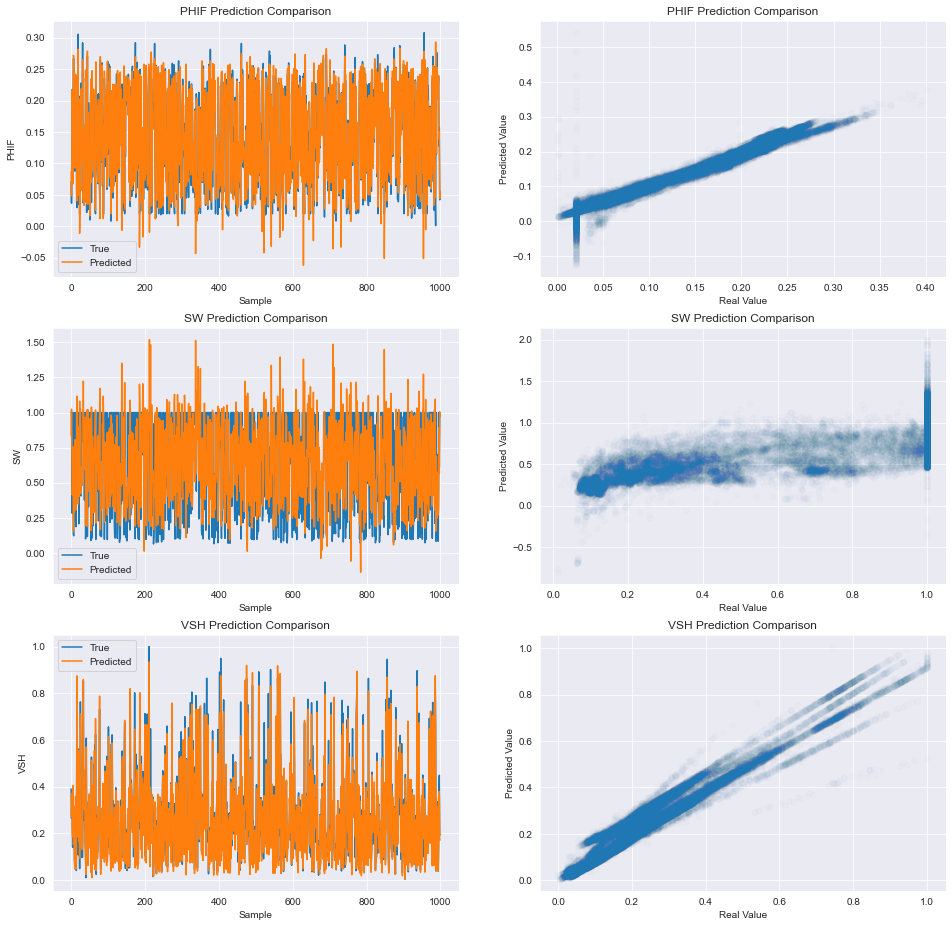

In [68]:
y_pred = lm.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

In [69]:
y_val_pred = lm.predict(X_val[X_col])

RMSE: 0.12648
    PHIF  : 0.01895
    SW    : 0.21413
    VSH   : 0.04221
R^2:  0.8473841128488057
    PHIF  : 0.94737
    SW    : 0.63813
    VSH   : 0.95665


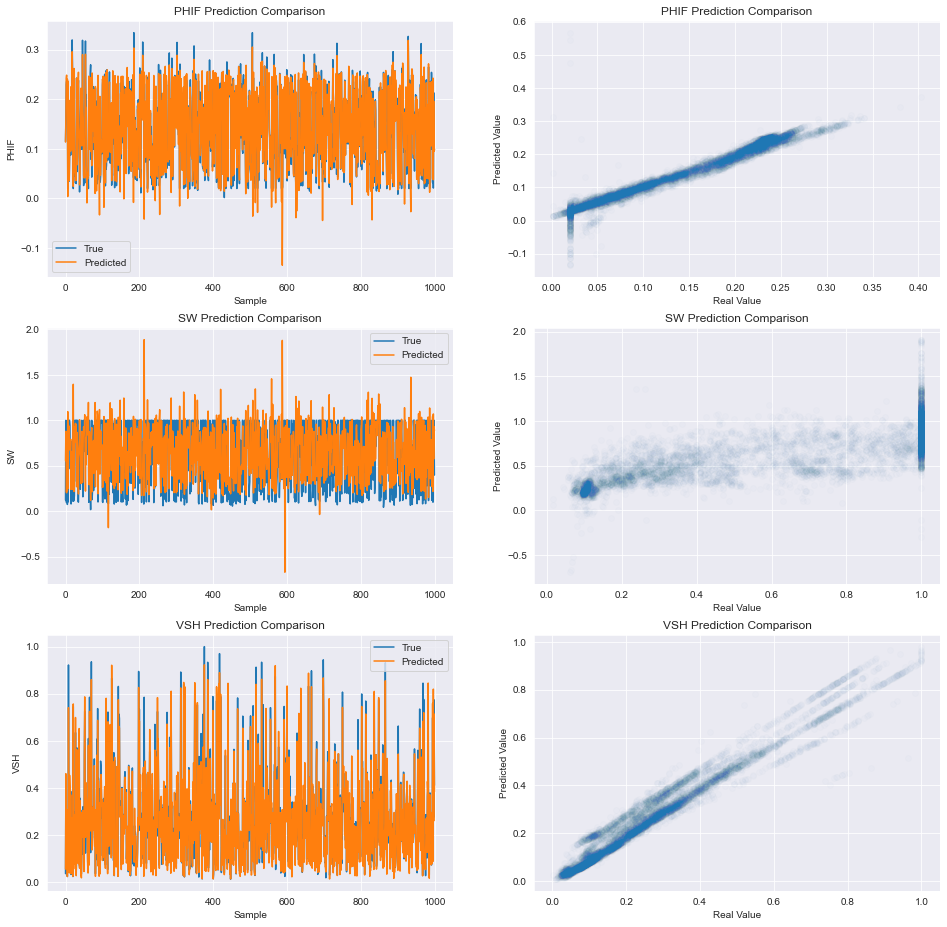

In [70]:
result_plot(y_val_pred, y_val[y_col].to_numpy(), n_points=1000)

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
test_data = np.array(test[X_col])

# Imputation transformer for completing missing values.
# You may try better ways to impute the missing values.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data = imp_mean.fit_transform(test_data)


In [73]:
test_data_df = pd.DataFrame(test_data, columns = X_col)
test_data_df.head()

CALI  DEN    GR  NEU  PEF  RDEP  RMED    ROP
0  8.28 2.55  9.79 0.13 5.86  2.88  2.65 262.28
1  8.28 2.52 11.28 0.11 6.02  2.88  2.65 262.04
2  8.28 2.51  9.95 0.11 6.06  3.03  2.93 261.99
3  8.28 2.58  8.63 0.11 6.20  3.05  2.97 261.72
4  8.29 2.55  7.31 0.12 5.18  3.05  2.97 261.52

### Statsmodels

In [74]:
y_train.head()

PHIF   SW  VSH  log_PHIF  log_SW  log_VSH
27436  0.07 1.00 0.39     -2.65    0.00    -0.94
11742  0.04 1.00 0.26     -3.30    0.00    -1.33
33483  0.09 0.67 0.35     -2.44   -0.40    -1.04
21713  0.22 0.28 0.23     -1.53   -1.27    -1.47
41984  0.19 0.93 0.14     -1.65   -0.08    -1.97

In [75]:
whole_train = X_train.copy()
for col in y_train.columns:
    whole_train[col] = y_train[col]
whole_train.head()

CALI  DEN    GR  NEU  PEF  RDEP  RMED   ROP  log_CALI  log_DEN  ...  \
27436  8.67 2.54 49.82 0.23 6.80  1.81  2.01 29.98      2.16     0.93  ...   
11742  8.70 2.59 42.29 0.11 0.07  1.99  3.03 24.62      2.16     0.95  ...   
33483  8.67 2.50 48.16 0.24 5.89  7.82  5.63 30.02      2.16     0.92  ...   
21713  8.52 2.26 32.88 0.18 4.80  7.06  7.38 29.87      2.14     0.81  ...   
41984  8.67 2.31 29.25 0.16 5.27  0.47  0.46 14.94      2.16     0.84  ...   

       log_PEF  log_RDEP  log_RMED  log_ROP  PHIF   SW  VSH  log_PHIF  log_SW  \
27436     1.92      0.59      0.70     3.40  0.07 1.00 0.39     -2.65    0.00   
11742    -2.63      0.69      1.11     3.20  0.04 1.00 0.26     -3.30    0.00   
33483     1.77      2.06      1.73     3.40  0.09 0.67 0.35     -2.44   -0.40   
21713     1.57      1.95      2.00     3.40  0.22 0.28 0.23     -1.53   -1.27   
41984     1.66     -0.75     -0.77     2.70  0.19 0.93 0.14     -1.65   -0.08   

       log_VSH  
27436    -0.94  
11742    -1.33  
33483    -1.04  
21713    -1.47  
41984    -1.97  

[5 rows x 22 columns]

In [76]:
train_col = ['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'ROP', 'RDEP', 'RMED', 'PHIF', 'SW','VSH']

In [77]:
def train_test(target,feature_combination):
    """
    INPUT:
    -target(str): the target variable
    -feature_combination (str): combination of the features 
    """
    
    results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
    print(results.summary())

    # test data
    y_preds = results.predict(X_val)
    print('\n\n The following are the metrics on the test data')
    scores(y_preds, y_val[target])
    

In [78]:
train_test('PHIF','CALI+DEN+GR+NEU+PEF+ROP+log_RDEP')

                            OLS Regression Results                            
Dep. Variable:                   PHIF   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:49:34   Log-Likelihood:                 86051.
No. Observations:               32075   AIC:                        -1.721e+05
Df Residuals:                   32067   BIC:                        -1.720e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3847      0.010    135.213      0.0

In [79]:
target = 'PHIF'
feature_combination = 'CALI+DEN+GR+NEU+PEF+ROP+np.log(RDEP)'

results_phi = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results_phi.summary())

# val data
y_pred_phi = results_phi.predict(X_val)
print('\n\n The following are the metrics on the test data')
scores(y_pred_phi, y_val['PHIF'])

y_pred_testPhi = results_phi.predict(test_data_df)

                            OLS Regression Results                            
Dep. Variable:                   PHIF   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:50:00   Log-Likelihood:                 86051.
No. Observations:               32075   AIC:                        -1.721e+05
Df Residuals:                   32067   BIC:                        -1.720e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3847      0.010    135.213   

In [80]:
target = 'np.log(SW)'
feature_combination = 'DEN*NEU+GR+PEF+np.log(RDEP)*DEN'

results_sw = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results_sw.summary())

   # val data
y_pred_sw = np.exp(results_sw.predict(X_val))
print('\n\n The following are the metrics on the test data')
scores(y_pred_sw, y_val['SW'])

# test data
y_pred_testSw = results_sw.predict(test_data_df)

                            OLS Regression Results                            
Dep. Variable:             np.log(SW)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 6.647e+04
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:50:03   Log-Likelihood:                 5203.2
No. Observations:               32075   AIC:                        -1.039e+04
Df Residuals:                   32067   BIC:                        -1.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.8557      0.082  

In [81]:
target = 'np.log(VSH+1)'
feature_combination = 'DEN*NEU+GR+PEF+np.log(RDEP)'

results_vsh = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results_vsh.summary())

   # val data
y_pred_vsh = np.exp(results_vsh.predict(X_val))-1
print('\n\n The following are the metrics on the test data')
scores(y_pred_vsh, y_val['VSH'])

# test data
y_pred_testVsh = results_vsh.predict(test_data_df)

                            OLS Regression Results                            
Dep. Variable:        np.log(VSH + 1)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.269e+05
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:50:04   Log-Likelihood:                 67579.
No. Observations:               32075   AIC:                        -1.351e+05
Df Residuals:                   32068   BIC:                        -1.351e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1487      0.009    -17.454   

In [82]:
whole_train.head()

CALI  DEN    GR  NEU  PEF  RDEP  RMED   ROP  log_CALI  log_DEN  ...  \
27436  8.67 2.54 49.82 0.23 6.80  1.81  2.01 29.98      2.16     0.93  ...   
11742  8.70 2.59 42.29 0.11 0.07  1.99  3.03 24.62      2.16     0.95  ...   
33483  8.67 2.50 48.16 0.24 5.89  7.82  5.63 30.02      2.16     0.92  ...   
21713  8.52 2.26 32.88 0.18 4.80  7.06  7.38 29.87      2.14     0.81  ...   
41984  8.67 2.31 29.25 0.16 5.27  0.47  0.46 14.94      2.16     0.84  ...   

       log_PEF  log_RDEP  log_RMED  log_ROP  PHIF   SW  VSH  log_PHIF  log_SW  \
27436     1.92      0.59      0.70     3.40  0.07 1.00 0.39     -2.65    0.00   
11742    -2.63      0.69      1.11     3.20  0.04 1.00 0.26     -3.30    0.00   
33483     1.77      2.06      1.73     3.40  0.09 0.67 0.35     -2.44   -0.40   
21713     1.57      1.95      2.00     3.40  0.22 0.28 0.23     -1.53   -1.27   
41984     1.66     -0.75     -0.77     2.70  0.19 0.93 0.14     -1.65   -0.08   

       log_VSH  
27436    -0.94  
11742    -1.33  
33483    -1.04  
21713    -1.47  
41984    -1.97  

[5 rows x 22 columns]

In [83]:
y_pred_ols = pd.DataFrame({'PHIF':y_pred_phi,'SW':y_pred_sw,'VSH':y_pred_vsh})
y_pred_ols.reset_index(drop = True, inplace = True)
y_pred_ols

PHIF   SW  VSH
0     0.11 0.19 0.09
1     0.17 0.82 0.45
2     0.24 0.09 0.10
3     0.24 0.09 0.11
4     0.20 0.50 0.10
...    ...  ...  ...
8014  0.10 0.84 0.51
8015  0.11 0.65 0.36
8016  0.19 0.30 0.26
8017  0.07 1.08 0.29
8018  0.06 1.02 0.64

[8019 rows x 3 columns]

In [84]:
y_val_real = y_val[y_col].reset_index(drop = True)
y_val_real

PHIF   SW  VSH
0     0.11 0.12 0.04
1     0.16 1.00 0.41
2     0.23 0.10 0.09
3     0.24 0.10 0.10
4     0.20 0.49 0.08
...    ...  ...  ...
8014  0.08 1.00 0.53
8015  0.09 0.73 0.38
8016  0.20 0.28 0.29
8017  0.06 1.00 0.32
8018  0.07 1.00 0.80

[8019 rows x 3 columns]

RMSE: 0.08126
    PHIF  : 0.01879
    SW    : 0.13309
    VSH   : 0.04179
R^2:  0.9219821431241851
    PHIF  : 0.94824
    SW    : 0.86022
    VSH   : 0.95749


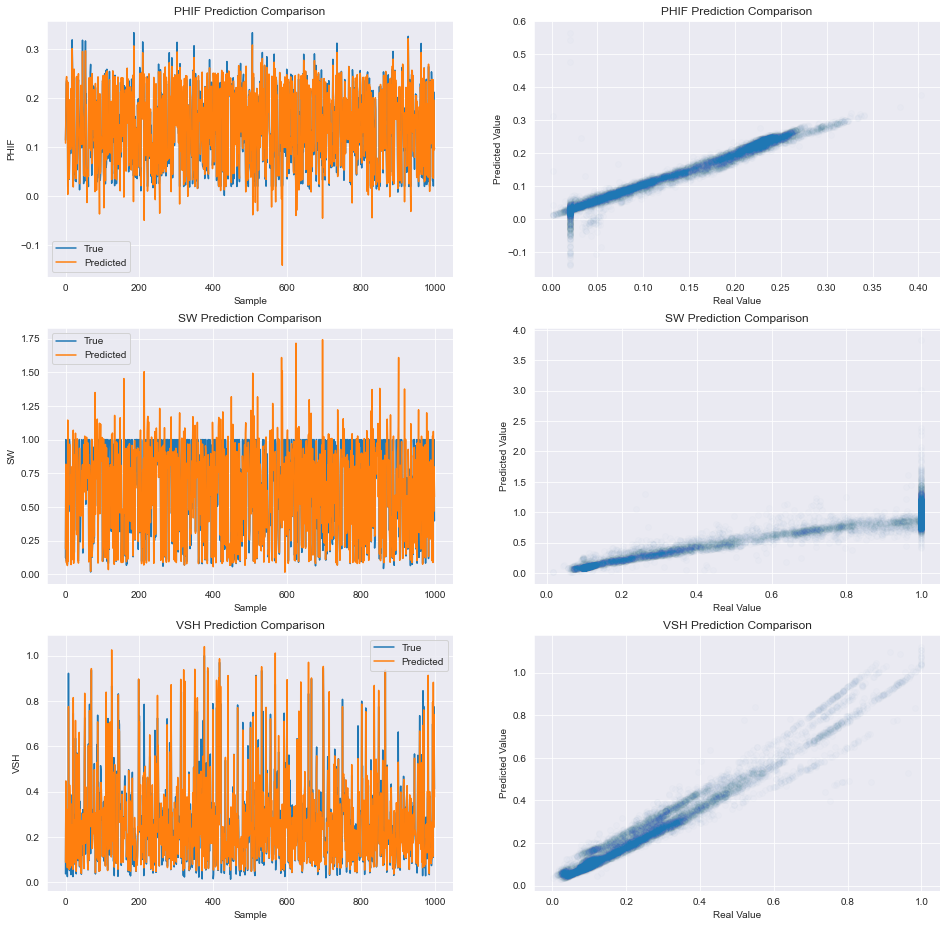

In [85]:
result_plot(y_pred_ols.to_numpy(), y_val_real.to_numpy(), n_points=1000)

In [86]:
# Prediction on contest test data
y_pred_Test_OLS = pd.DataFrame({'PHIF':y_pred_testPhi,'SW':y_pred_testSw,'VSH':y_pred_testVsh})
y_pred_Test_OLS.reset_index(drop = True, inplace = True)
y_pred_Test_OLS

PHIF    SW  VSH
0      0.14 -0.11 0.06
1      0.14 -0.16 0.07
2      0.15 -0.23 0.06
3      0.12 -0.02 0.06
4      0.13 -0.09 0.05
...     ...   ...  ...
11270  0.14 -0.07 0.19
11271  0.14 -0.04 0.19
11272  0.14 -0.03 0.18
11273  0.15 -0.07 0.17
11274  0.16 -0.13 0.17

[11275 rows x 3 columns]

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
RF = RandomForestRegressor()
RF.fit(X_train[X_col], y_train[y_col])

RandomForestRegressor()

In [89]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from statistics import mean

In [90]:
scores = cross_val_score(RF, X_train[X_col], y_train[y_col], cv=10, scoring='r2')

scores.mean()

0.9925679597462034

In [91]:
scores = cross_val_score(RF, X_train[X_col], y_train[y_col], cv=10, scoring='neg_root_mean_squared_error')
scores.mean()

-0.018544730940468497

RMSE: 0.00778
    PHIF  : 0.00241
    SW    : 0.01150
    VSH   : 0.00659
R^2:  0.9990013018893765
    PHIF  : 0.99914
    SW    : 0.99896
    VSH   : 0.99891


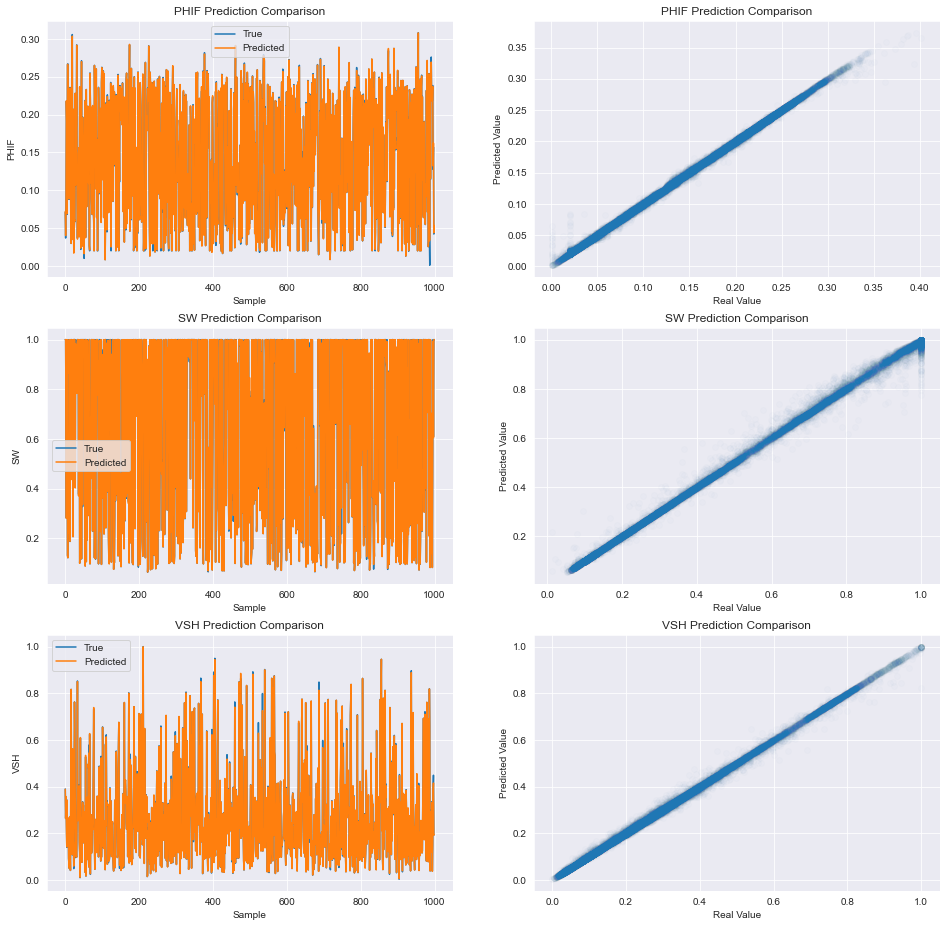

In [92]:
y_pred = RF.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.02161
    PHIF  : 0.00667
    SW    : 0.03278
    VSH   : 0.01677
R^2:  0.9927167599544893
    PHIF  : 0.99348
    SW    : 0.99152
    VSH   : 0.99315


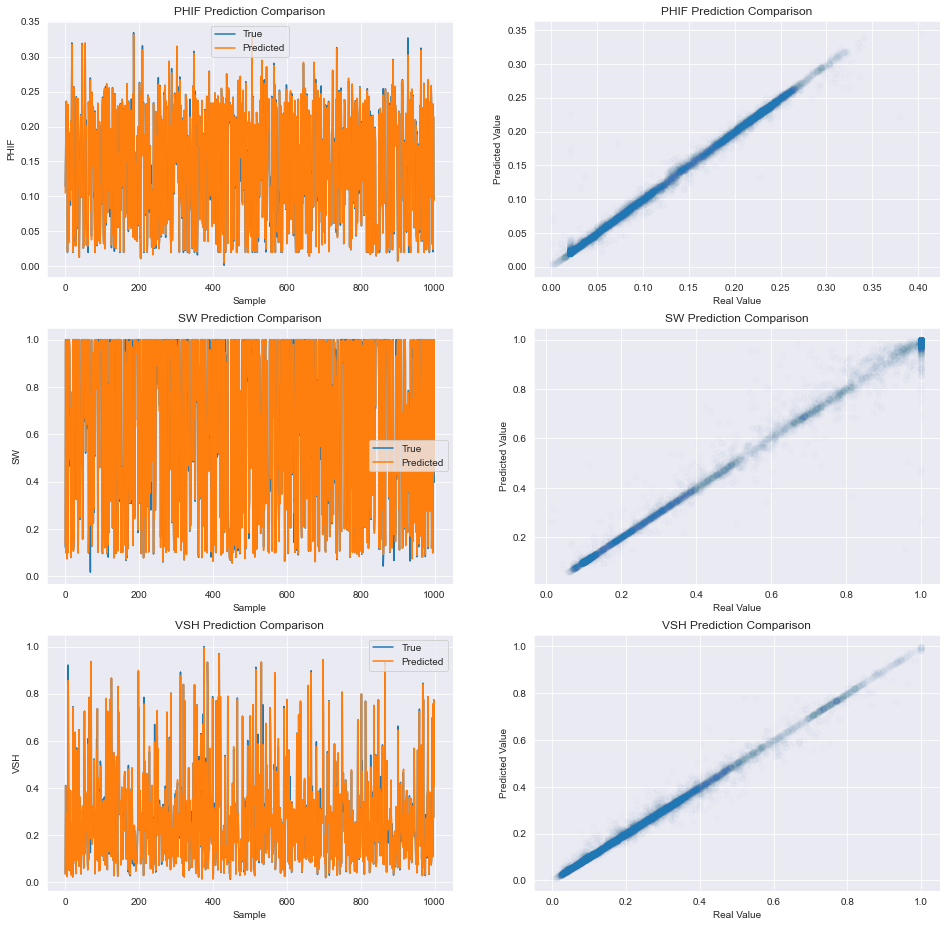

In [93]:
y_pred_val = RF.predict(X_val[X_col])
result_plot(y_pred_val, y_val[y_col].to_numpy(), n_points=1000)

In [94]:
## Prediction on test set for submission

y_pred_test_RF = pd.DataFrame(data = RF.predict(test_data), columns = y_col)
y_pred_test_RF

PHIF   SW  VSH
0      0.07 1.00 0.06
1      0.08 1.00 0.08
2      0.09 0.99 0.07
3      0.05 0.99 0.05
4      0.07 1.00 0.05
...     ...  ...  ...
11270  0.15 0.95 0.19
11271  0.15 0.95 0.19
11272  0.19 0.86 0.15
11273  0.18 0.87 0.15
11274  0.16 0.90 0.16

[11275 rows x 3 columns]

In [96]:
y_pred_test_RF.to_csv(r'C:\Users\chine\Documents\spwla\submission.csv', index=False)

In [151]:
RF = RandomForestRegressor()
RF_best = grid_search(RF, {})

C:\Users\chine\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chine\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chine\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\chine\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\chine\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\chine\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

**GradientBoosting**

In [116]:
# GradientBoosting model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

GBR = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
GBR.fit(X_train[X_col], y_train[y_col])

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [117]:
scores = cross_val_score(GBR, X_train[X_col], y_train[y_col], cv=10, scoring='r2')

scores.mean()

0.9848070705889158

In [ ]:
scores = cross_val_score(GBR, X_train[X_col], y_train[y_col], cv=10, scoring='neg_root_mean_squared_error')
scores.mean()

RMSE: 0.03187
    PHIF  : 0.00651
    SW    : 0.04970
    VSH   : 0.02313
R^2:  0.9869359058780603
    PHIF  : 0.99371
    SW    : 0.98057
    VSH   : 0.98653


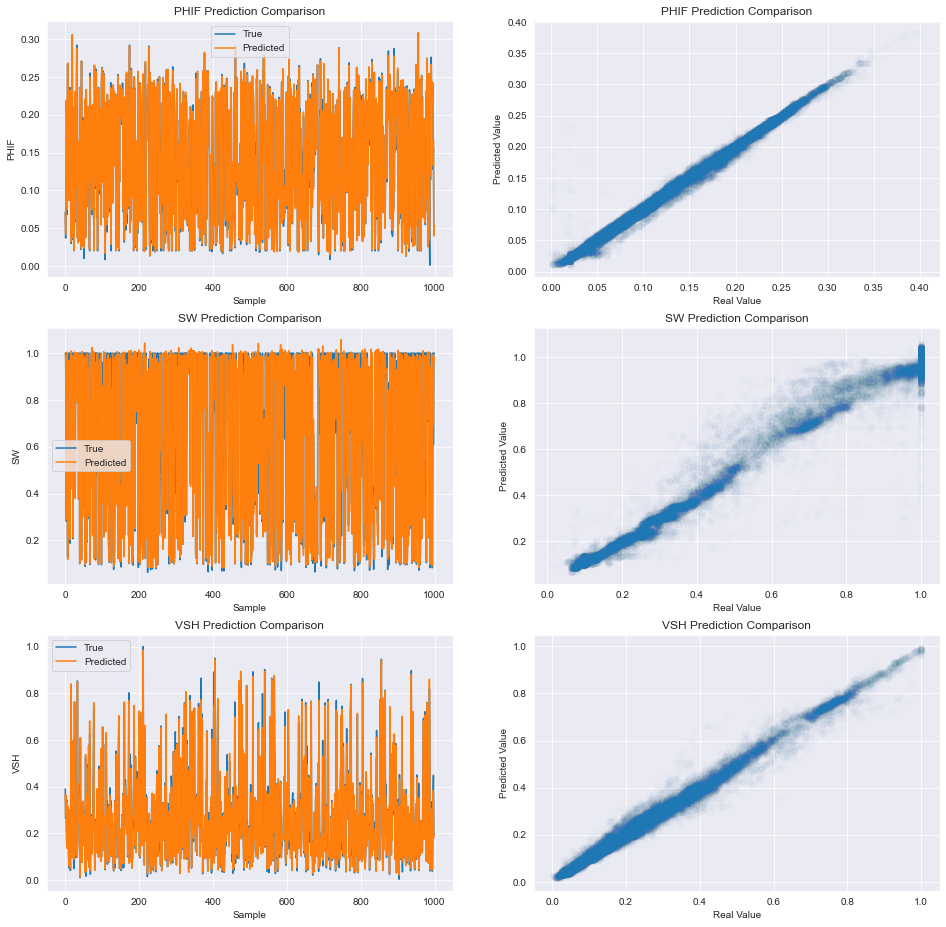

In [118]:
y_pred = GBR.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.03343
    PHIF  : 0.00715
    SW    : 0.05215
    VSH   : 0.02414
R^2:  0.9856230061144843
    PHIF  : 0.99251
    SW    : 0.97854
    VSH   : 0.98582


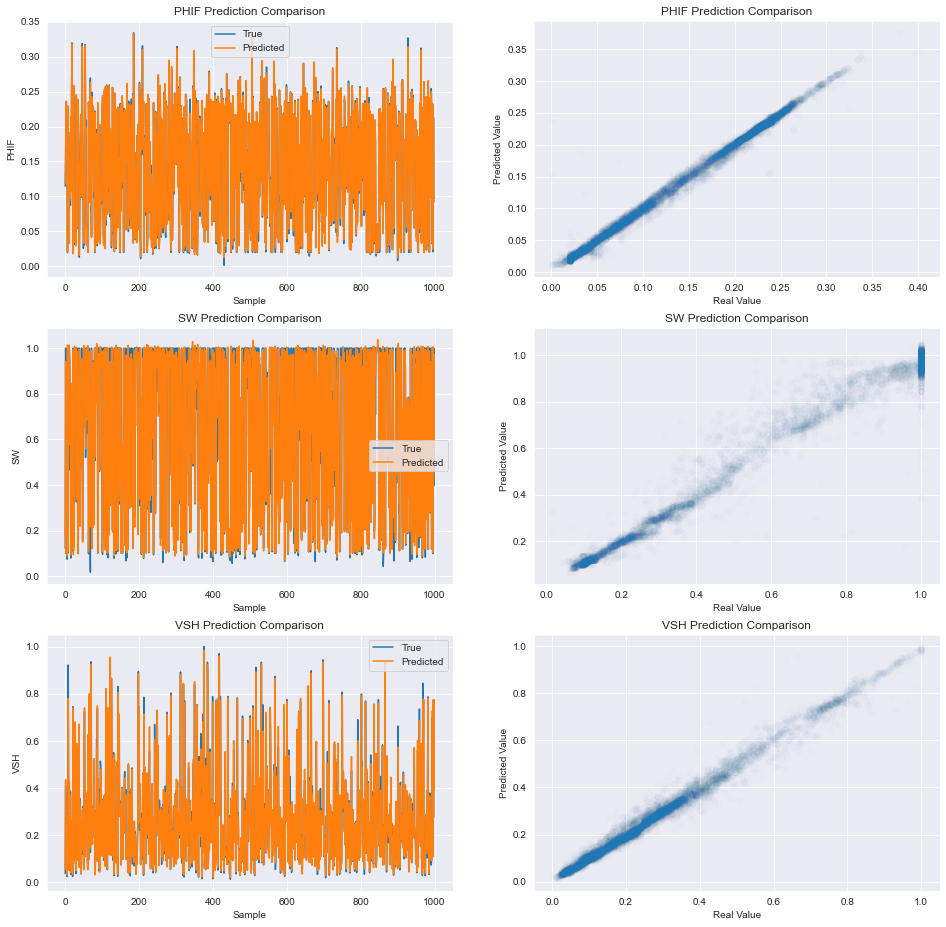

In [119]:
y_pred_val = GBR.predict(X_val[X_col])
result_plot(y_pred_val, y_val[y_col].to_numpy(), n_points=1000)

**Adaptive Boosting**

In [120]:
# Adaptive Boosting model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

ADBR = MultiOutputRegressor(AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 20), random_state = 0))
ADBR.fit(X_train[X_col], y_train[y_col])

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                                                 random_state=0))

RMSE: 0.00037
    PHIF  : 0.00006
    SW    : 0.00052
    VSH   : 0.00036
R^2:  0.9999979879787366
    PHIF  : 1.00000
    SW    : 1.00000
    VSH   : 1.00000


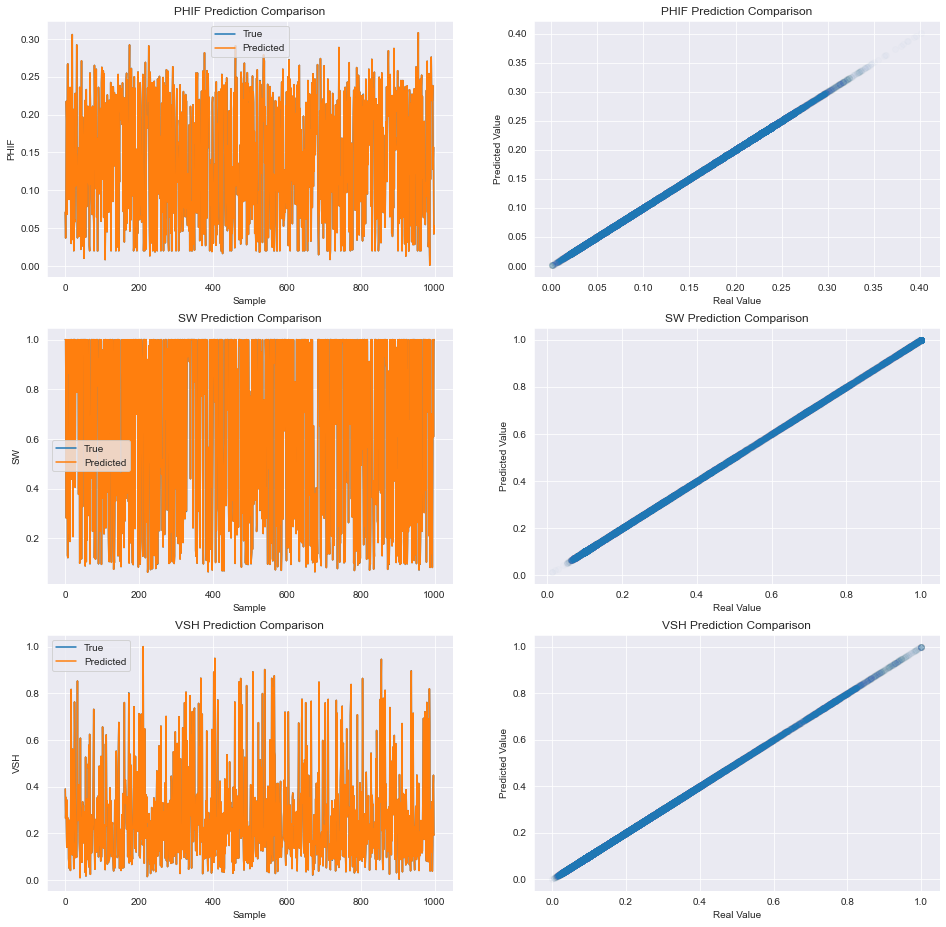

In [122]:
y_pred = ADBR.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.01841
    PHIF  : 0.00379
    SW    : 0.02837
    VSH   : 0.01405
R^2:  0.9955790300020331
    PHIF  : 0.99789
    SW    : 0.99365
    VSH   : 0.99520


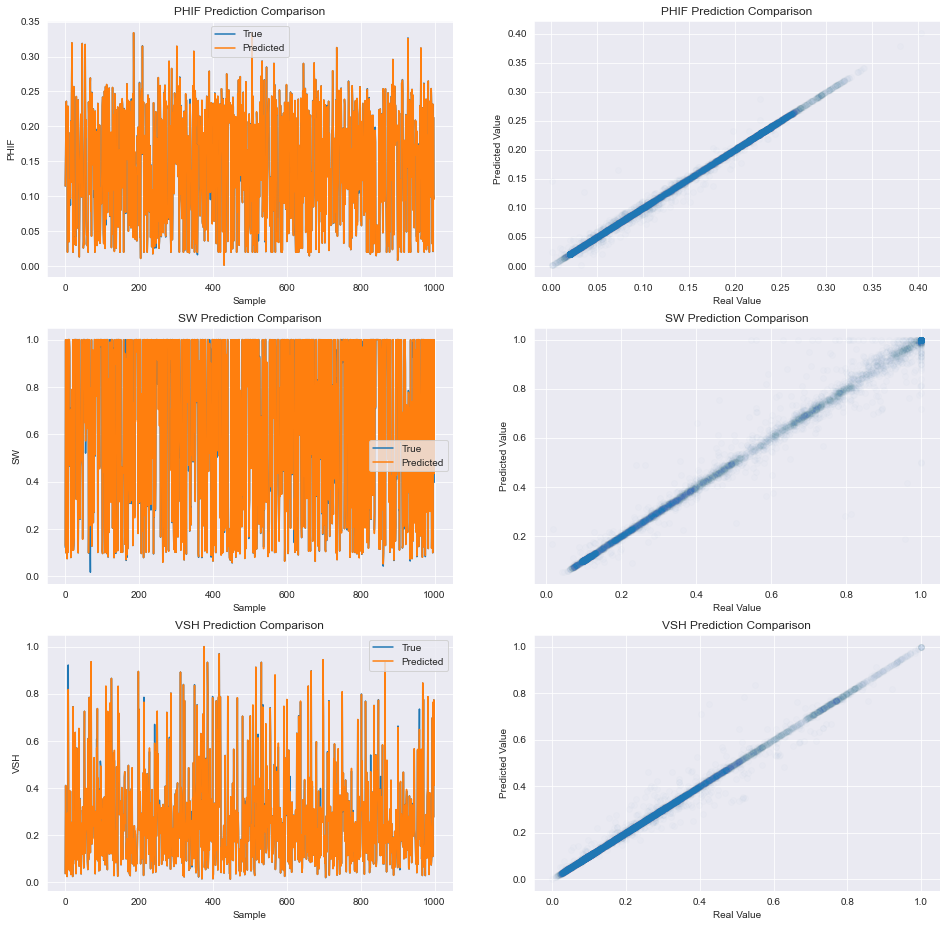

In [123]:
y_pred_val = ADBR.predict(X_val[X_col])
result_plot(y_pred_val, y_val[y_col].to_numpy(), n_points=1000)

In [124]:
## Prediction on test set for submission
y_pred_test_ADBR = pd.DataFrame(data = ADBR.predict(test_data), columns = y_col)
y_pred_test_ADBR

PHIF   SW  VSH
0      0.07 1.00 0.07
1      0.08 1.00 0.08
2      0.09 1.00 0.07
3      0.05 1.00 0.06
4      0.07 1.00 0.05
...     ...  ...  ...
11270  0.14 1.00 0.14
11271  0.14 1.00 0.14
11272  0.14 1.00 0.12
11273  0.15 1.00 0.11
11274  0.16 1.00 0.11

[11275 rows x 3 columns]

In [125]:
y_pred_test_ADBR.to_csv(r'C:\Users\chine\Documents\spwla\submissionADBR.csv', index=False)

In [149]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [114]:
RF

RandomForestRegressor()

In [97]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle = True, random_state=42)
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(r_clf, param_grid=param_grid, cv=cv, verbose=3) 
param_grid = {'max_samples': [50,100, 200, 500],'n_estimators': [100,200],
              'max_depth': [3,4,5,6], 'min_samples_split': [5,6,7]} # dictionary with keys

grid = GridSearchCV(RF, param_grid=param_grid, cv=cv, verbose=3) 

In [101]:
grid.fit(X_train[X_col], y_train[y_col])

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV 1/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 2/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 3/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 4/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 5/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 6/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 7/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 8/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=3, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=3, 

[CV 2/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 3/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 4/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 5/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 6/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 7/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=3, max_samples=100, min_samples_split=6, n_estimators=200

[CV 3/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 4/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 5/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 6/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 7/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV 2/10] END max_depth=3, max_samples=200, min_samples_split=7, n_estimators=200

[CV 4/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 5/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 6/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 7/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 10/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 2/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 3/10] END max_depth=4, max_samples=50, min_samples_split=5, n_estimators=200; total ti

[CV 5/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 6/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 7/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV 2/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV 3/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV 4/10] END max_depth=4, max_samples=100, min_samples_split=6, n_estimators=200

[CV 6/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 7/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV 2/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV 3/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV 4/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV 5/10] END max_depth=4, max_samples=200, min_samples_split=7, n_estimators=200

[CV 7/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 8/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 2/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 3/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 4/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 5/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 6/10] END max_depth=5, max_samples=50, min_samples_split=5, n_estimators=200; total ti

[CV 8/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 9/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 10/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 2/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 3/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 4/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 5/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 6/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 7/10] END max_depth=5, max_samples=100, min_samples_split=6, n_estimators=200

[CV 9/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV 10/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV 1/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 2/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 3/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 4/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 5/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 6/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 7/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 8/10] END max_depth=5, max_samples=200, min_samples_split=7, n_estimators=200

[CV 10/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 1/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 2/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 3/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 4/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 5/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 6/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 7/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 8/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV 9/10] END max_depth=6, max_samples=50, min_samples_split=5, n_estimators=200; total ti

[CV 1/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 2/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 3/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 4/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 5/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 6/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 7/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 8/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 9/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV 10/10] END max_depth=6, max_samples=100, min_samples_split=6, n_estimators=200

[CV 2/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 3/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 4/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 5/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 6/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 7/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 8/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 9/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 10/10] END max_depth=6, max_samples=200, min_samples_split=7, n_estimators=200; total time=   0.6s
[CV 1/10] END max_depth=6, max_samples=500, min_samples_split=5, n_estimators=100

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_samples': [50, 100, 200, 500],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [100, 200]},
             verbose=3)

In [104]:
RF1=grid.best_estimator_ 

RMSE: 0.00778
    PHIF  : 0.00241
    SW    : 0.01150
    VSH   : 0.00659
R^2:  0.9990013018893765
    PHIF  : 0.99914
    SW    : 0.99896
    VSH   : 0.99891


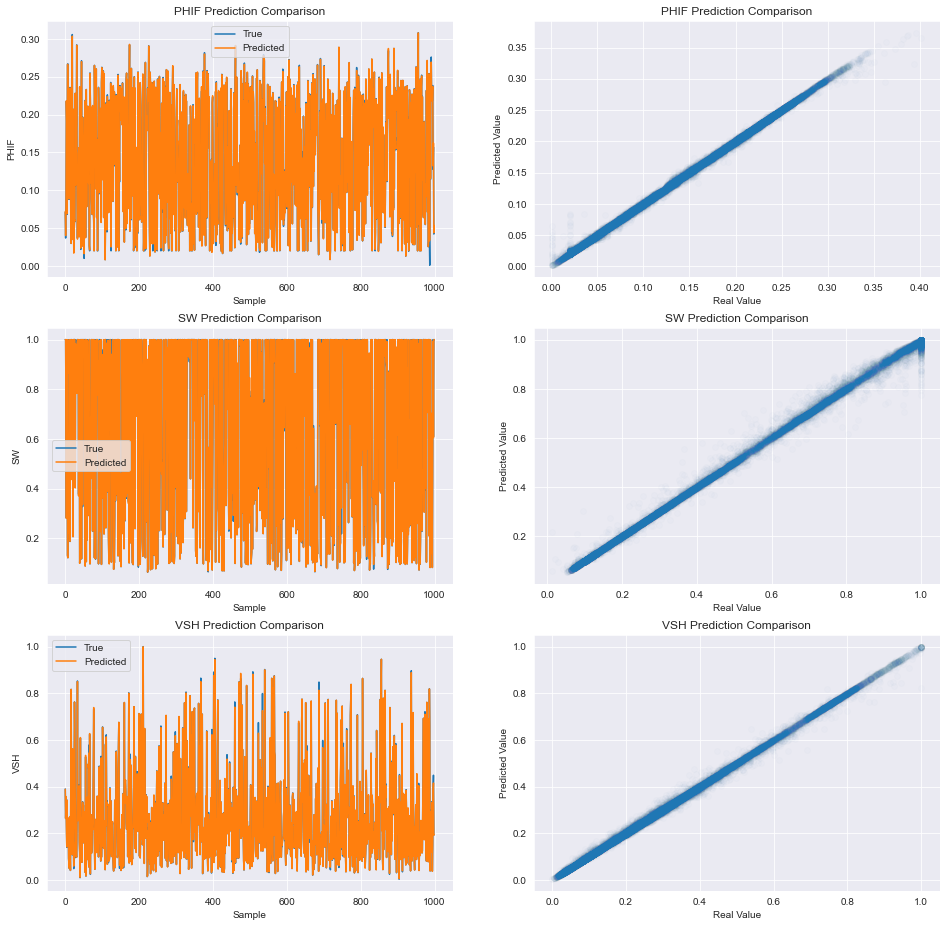

In [105]:
y_pred1 = RF1.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.04816
    PHIF  : 0.02068
    SW    : 0.06865
    VSH   : 0.04263
R^2:  0.9519568053812687
    PHIF  : 0.93730
    SW    : 0.96280
    VSH   : 0.95577


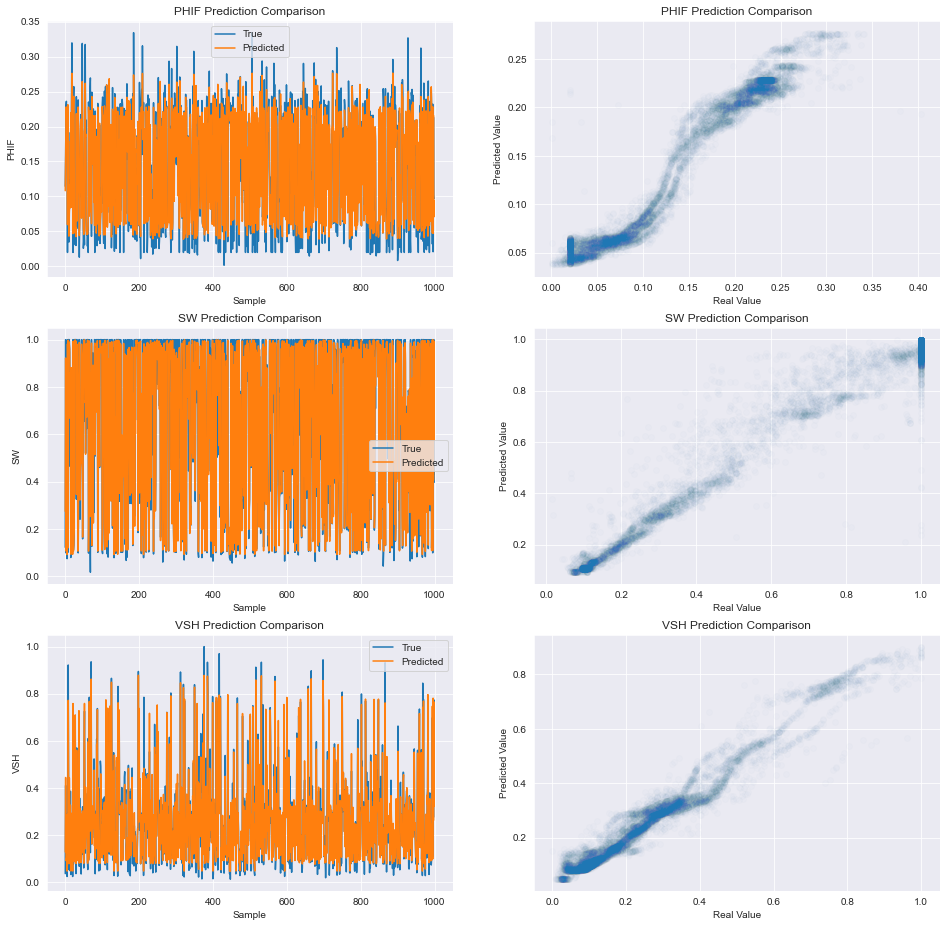

In [106]:
y_pred_val1 = RF1.predict(X_val[X_col])
result_plot(y_pred_val1, y_val[y_col].to_numpy(), n_points=1000)

In [147]:
param_grid

{'max_samples': [50, 100, 200, 500],
 'n_estimators': [100, 200],
 'max_depth': [3, 4, 5, 6],
 'min_samples_split': [5, 6, 7]}

In [108]:
from sklearn.neural_network import MLPRegressor
NN_regressor = MLPRegressor(random_state=0)
NN_base = NN_regressor
NN_base.fit(X_train[X_col], y_train[y_col])
print('R-squared value:', NN_base.score(X_val[X_col], y_val[y_col]))

R-squared value: -100.72341781083925


In [141]:
#import required packages

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


rmse_val = [] # To store rmse values for different k
k_val = []    # To store values of K
R2 = []       # To store R2

for K in range(1, 20, 1):  

    k_val.append(K)
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train[X_col], y_train[y_col])  # fit the model
    y_pred_knn = model.predict(X_val[X_col]) # make prediction on test set
    
    training_R2 = model.score(X_train[X_col], y_train[y_col]) # Compute training R2
    test_R2 = model.score(X_val[X_col], y_val[y_col])       # Compute test R2
    R2.append(test_R2)
    
    error = sqrt(mean_squared_error(y_val[y_col], y_pred_knn)) #calculate rmse
    rmse_val.append(error)                         #store rmse values
    er=abs(y_val[y_col] - y_pred_knn)  


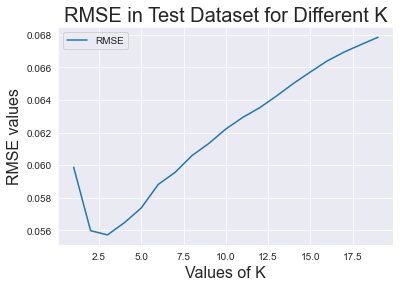

In [142]:
# To get Optimal K

#plotting the rmse values against k values
plt.plot(k_val, rmse_val, label = 'RMSE')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('RMSE values', fontsize = 16)
plt.title ('RMSE in Test Dataset for Different K', fontsize = 20)
plt.legend()

In [143]:
# KNN regression model
from sklearn import neighbors
KNN = neighbors.KNeighborsRegressor(n_neighbors = 3)
KNN.fit(X_train[X_col], y_train[y_col])

KNeighborsRegressor(n_neighbors=3)

RMSE: 0.03776
    PHIF  : 0.01943
    SW    : 0.05959
    VSH   : 0.01867
R^2:  0.9690644558820375
    PHIF  : 0.94391
    SW    : 0.97206
    VSH   : 0.99122


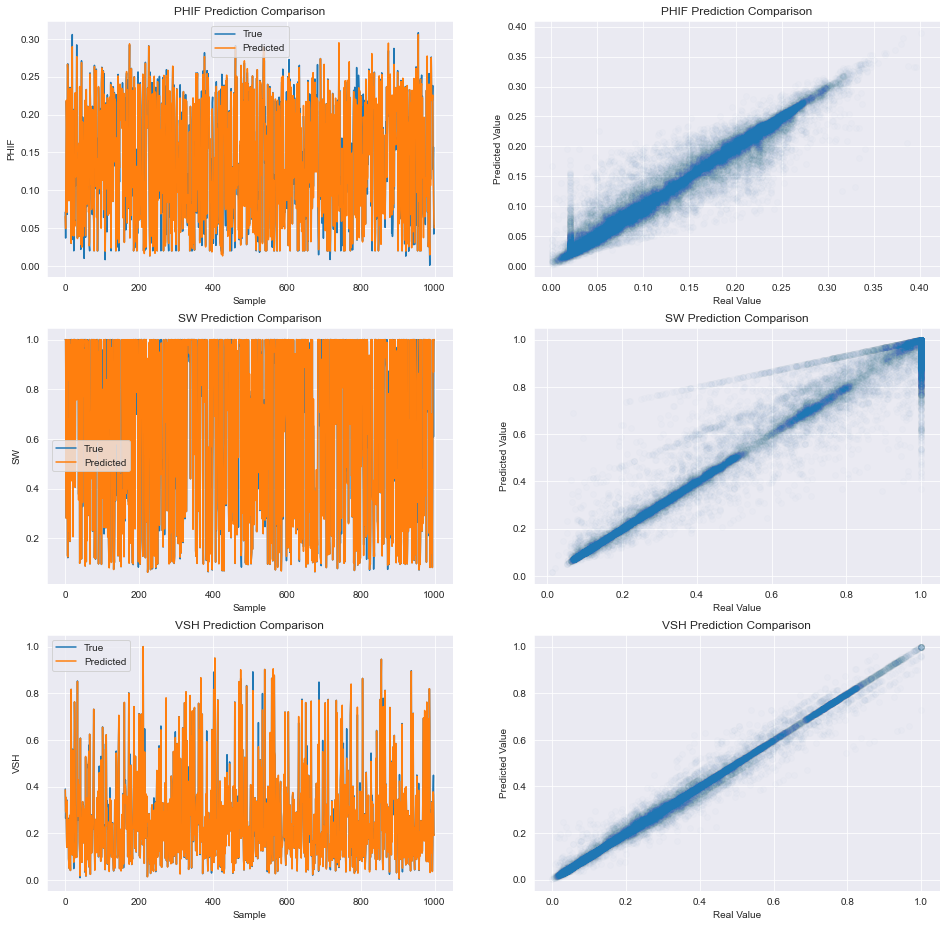

In [144]:
y_pred = KNN.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.05571
    PHIF  : 0.02864
    SW    : 0.08779
    VSH   : 0.02798
R^2:  0.9332965725751426
    PHIF  : 0.87977
    SW    : 0.93917
    VSH   : 0.98094


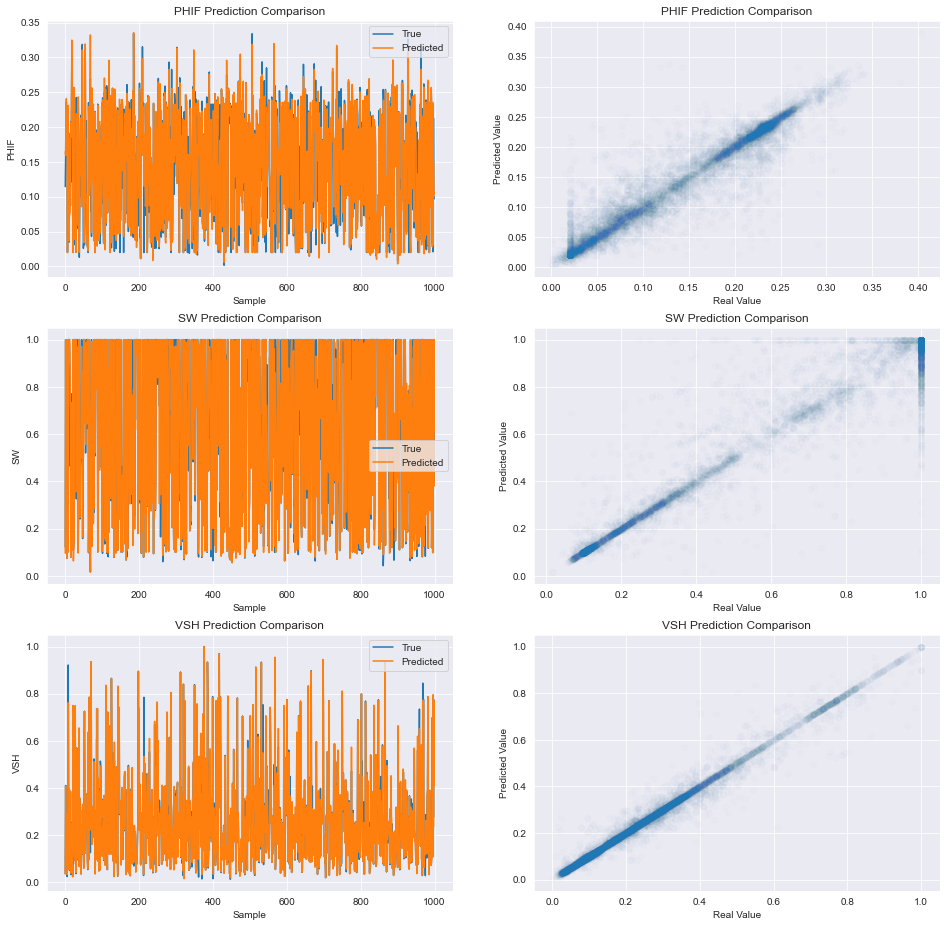

In [145]:
y_pred_val = KNN.predict(X_val[X_col])
result_plot(y_pred_val, y_val[y_col].to_numpy(), n_points=1000)

## Individual Forests

In [425]:
RF_phi = RandomForestRegressor()
RF_phi.fit(X_train[X_col], y_train.PHIF)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [429]:
model = RF_phi
col = 'PHIF'
r2 = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='r2')
rmse = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='neg_root_mean_squared_error')
print('cross validated R2 is {:.5f} \n RMSE is {:.5f}'.format(r2.mean(), rmse.mean()))

y_pred = model.predict(X_train[X_col])
scores(y_pred, y_train)

cross validated R2 is 0.99463 
 RMSE is -0.00585


TypeError: 'numpy.ndarray' object is not callable

In [426]:
RF_sw = RandomForestRegressor()
RF_sw.fit(X_train[X_col], y_train.SW)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model = RF_sw
col = 'SW'
r2 = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='r2')
rmse = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='neg_root_mean_squared_error')
print('cross validated R2 is {:.5f} \n RMSE is {:.5f}'.format(r2.mean(), rmse.mean()))

y_pred = model.predict(X_train[X_col])
scores(y_pred, y_train[col])

In [427]:
RF_vsh = RandomForestRegressor()
RF_vsh.fit(X_train[X_col], y_train.VSH)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model = RF_vsh
col = 'VSH'
r2 = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='r2')
rmse = cross_val_score(model, X_train[X_col], y_train[col], cv=10, scoring='neg_root_mean_squared_error')
print('cross validated R2 is {:.5f} \n RMSE is {:.5f}'.format(r2.mean(), rmse.mean()))

y_pred = model.predict(X_train[X_col])
scores(y_pred, y_train[col])